## Introduction to Data Science

### Analizing Data - Descriptive Statistics 

In [1]:
import os
import codecs
import time
import datetime
import pathlib

import pandas as pd
import numpy as np
import scipy.stats as ss
import scipy.signal as signal
from scipy.io.arff import loadarff

import matplotlib.pyplot as plt
import matplotlib.dates as md
from matplotlib import pylab as pl

Univariate Graphs
-----------------
- Where are the points?  
- How are they distributed?  
- What is the range of values?  
- Which are the typical, maximum and minimum values?  
- Are there clusters or trends?  
- Is the distribution symetrical?  
- Are there outliers?  
- Which features can be noted?  
- Are there descontinuities?  
- Are there unexpected values?  
- Can you identify known patterns?  

Specifying the path to the files:

In [2]:
datapath = pathlib.Path("../datasets/CSVs/")
outputs = pathlib.Path("../outputs/")

#### Loading the datasets

In [3]:
# First Dataset
!head ../datasets/CSVs/presidents.csv

 1       Washington      94
 2       Adams           48
 3       Jefferson       96
 4       Madison         96
 5       Monroe          96
 6       Adams           48
 7       Jackson         96
 8       Van_Buren       48
 9       Harrison         1
10       Tyler           47


In [4]:
presidents = np.genfromtxt(datapath / "presidents.csv", usecols=(2))
presidents_names = np.genfromtxt(datapath / "presidents.csv", usecols=(1), dtype=(str))

In [5]:
presidents

array([ 94.,  48.,  96.,  96.,  96.,  48.,  96.,  48.,   1.,  47.,  48.,
        16.,  32.,  48.,  48.,  49.,  47.,  96.,  48.,   7.,  41.,  48.,
        48.,  48.,  54.,  90.,  48.,  96.,  29.,  67.,  48., 146.,  92.,
        96.,  34.,  62.,  67.,  29.,  48.,  96.,  48.,  96.,  96.])

In [6]:
presidents_names

array(['Washington', 'Adams', 'Jefferson', 'Madison', 'Monroe', 'Adams',
       'Jackson', 'Van_Buren', 'Harrison', 'Tyler', 'Polk', 'Taylor',
       'Filmore', 'Pierce', 'Buchanan', 'Lincoln', 'Johnson', 'Grant',
       'Hayes', 'Garfield', 'Arthur', 'Cleveland', 'Harrison',
       'Cleveland', 'McKinley', 'Roosevelt', 'Taft', 'Wilson', 'Harding',
       'Coolidge', 'Hoover', 'Roosevelt', 'Truman', 'Eisenhower',
       'Kennedy', 'Johnson', 'Nixon', 'Ford', 'Carter', 'Reagan', 'Bush',
       'Clinton', 'Bush'], dtype='<U10')

In [7]:
df_presidents = pd.read_csv(datapath / "presidents.csv", header=None, sep='\s+', names=['Name', 'Other'], index_col=0)
df_presidents.head()

,Name,Other
1,Washington,94
2,Adams,48
3,Jefferson,96
4,Madison,96
5,Monroe,96


#### Plotting with MathPlotLib

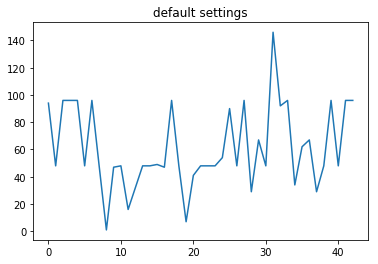

In [8]:
plt.plot(presidents)
plt.title('default settings')
plt.show()

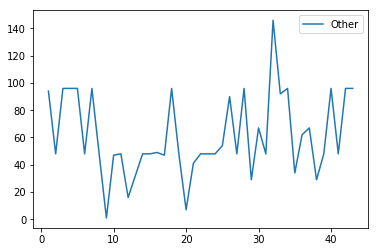

In [9]:
df_presidents.plot()

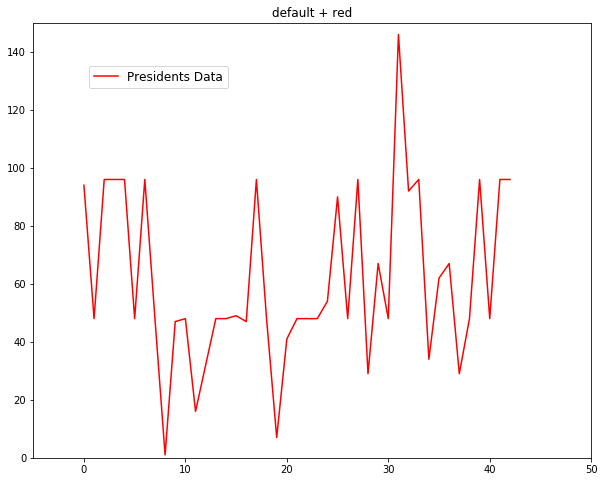

In [10]:
plt.figure(figsize=(10,8))
plt.plot(presidents,'r')
plt.title('default + red')
plt.legend(('Presidents Data',), loc=(0.1,0.85), fontsize=12)

P = plt.gca()
P.axis([-5.0,50.0,0.0,150.0])
plt.show()

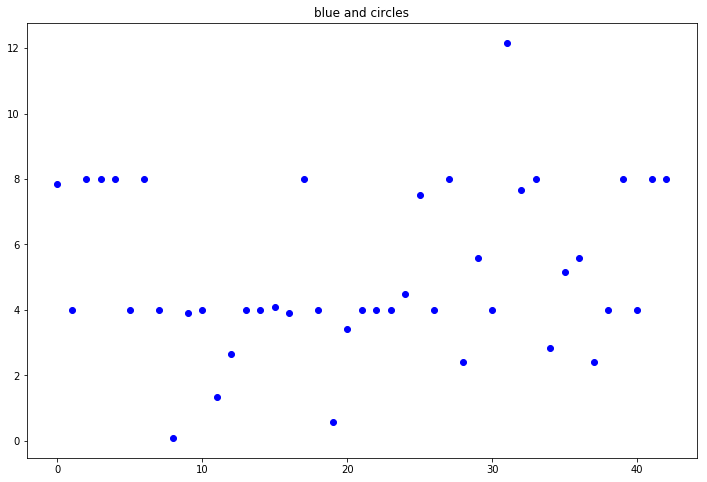

In [11]:
plt.figure(figsize=(12,8))
presidents_year = presidents/12.
plt.plot(presidents_year,'bo')
plt.title('blue and circles')

#plt.plot(presidents_year,'g.')
#plt.title('green and dots')

plt.show()

Histograms

http://matplotlib.sourceforge.net/api/pyplot_api.html#matplotlib.pyplot.hist

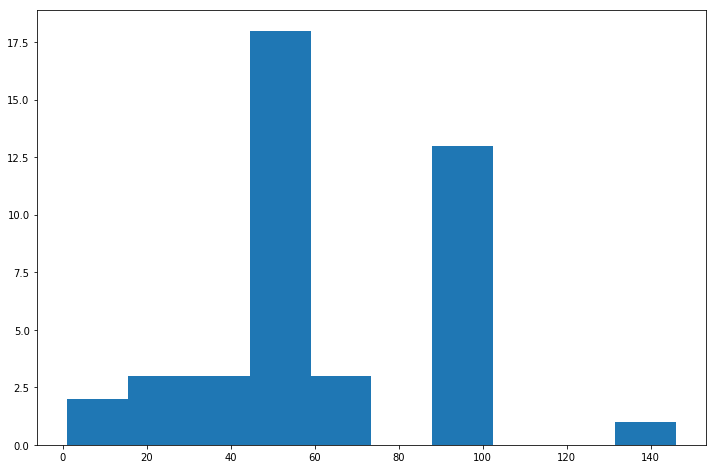

In [12]:
plt.figure(figsize=(12,8))
nbins=10
plt.hist(presidents, bins=nbins)
plt.show()

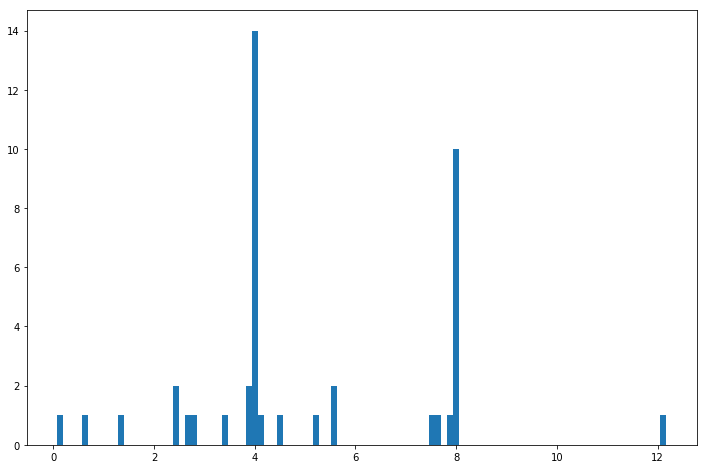

In [13]:
plt.figure(figsize=(12,8))
plt.hist(presidents_year, bins=10*nbins)
plt.show()

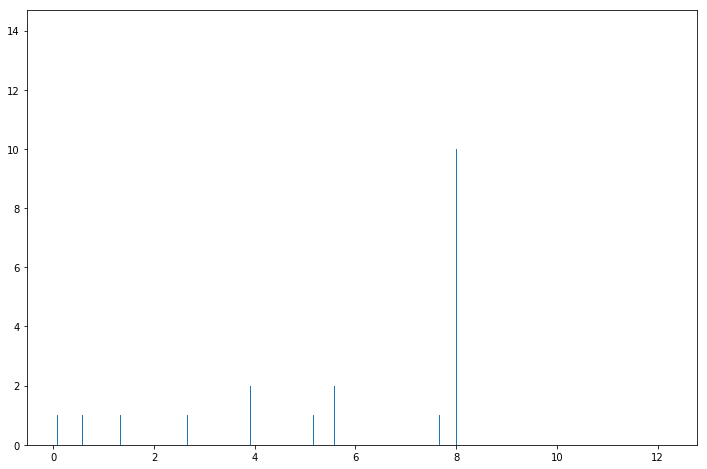

In [14]:
plt.figure(figsize=(12,8))
plt.hist(presidents_year, bins=100*nbins)
plt.show()

Gathering some information on the datasets:

http://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.describe.html



In [15]:
server_data = np.loadtxt(datapath / "serverdata.csv")
ss.describe(server_data)

DescribeResult(nobs=1000, minmax=(44.5, 2985.29), mean=849.18857, variance=456853.1843964515, skewness=1.3048517528837618, kurtosis=1.0261430787200698)

Usando uma série do Pandas  
http://pandas.pydata.org/

In [16]:
df_server = pd.Series(server_data)
df_server.describe()

count    1000.000000
mean      849.188570
std       675.909154
min        44.500000
25%       347.265000
50%       630.940000
75%      1125.880000
max      2985.290000
dtype: float64

In [17]:
df_server.head()

0     452.42
1     318.58
2     144.82
3     129.13
4    1216.45
dtype: float64

Kernel Density Estimates
------------------------
http://en.wikipedia.org/wiki/Kernel_density_estimation  
http://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.gaussian_kde.html

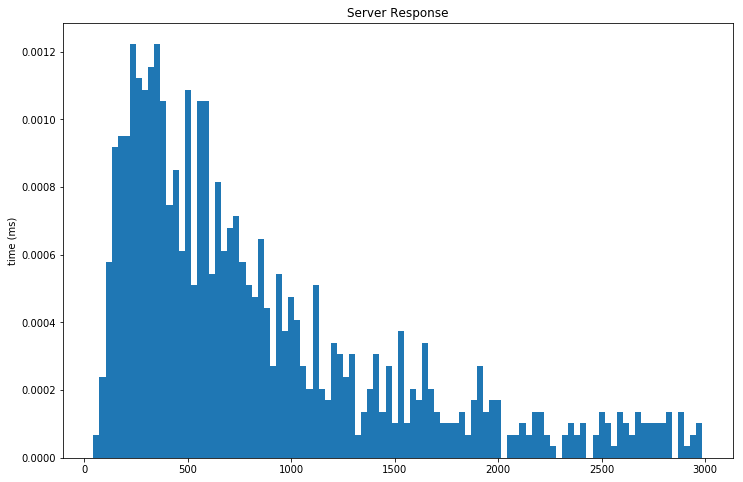

In [18]:
plt.figure(figsize=(12,8))
nbins=100
plt.hist(server_data, bins=nbins, density=True, align='mid')
plt.title('Server Response')
plt.ylabel('time (ms)')
plt.show()

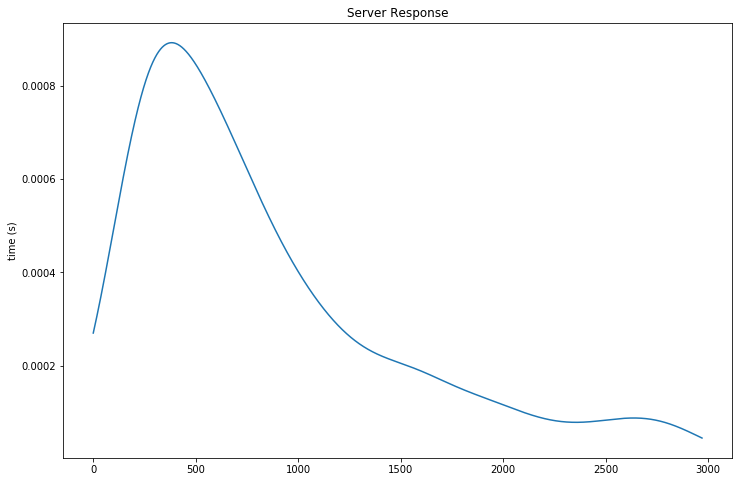

In [19]:
plt.figure(figsize=(12,8))
gkde = ss.gaussian_kde(server_data)
plt.plot(np.arange(0,(1.01*(max(server_data)-min(server_data))),.1), 
         gkde.evaluate(np.arange(0,(1.01*(max(server_data)-min(server_data))),.1)))
plt.title('Server Response')
plt.ylabel('time (s)')
plt.show()

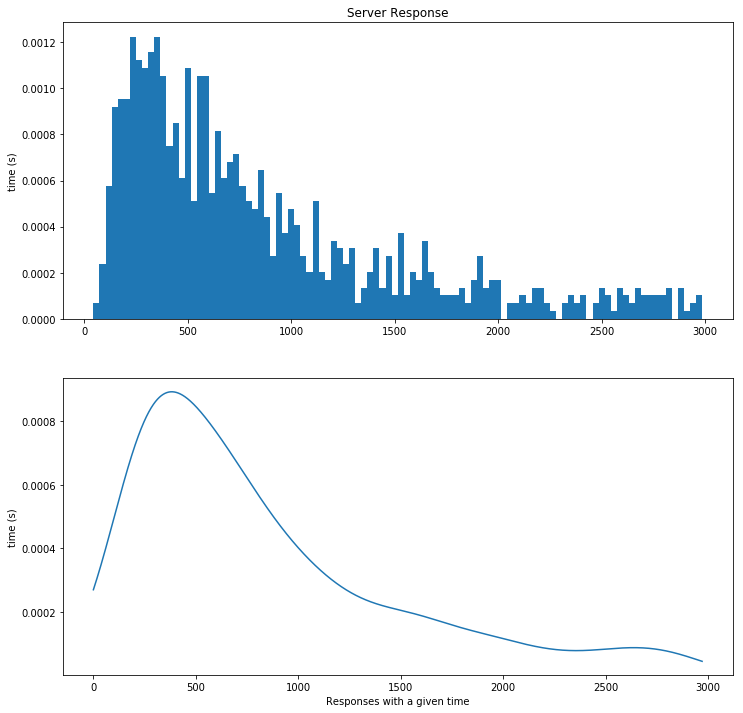

In [20]:
plt.figure(figsize=(12,12))
plt.subplot(2, 1, 1)
nbins=100
plt.hist(server_data, bins=nbins, density=True, align='mid')
plt.title('Server Response')
plt.ylabel('time (s)')

plt.subplot(2, 1, 2)
gkde = ss.gaussian_kde(server_data)
plt.plot(np.arange(0,(1.01*(max(server_data)-min(server_data))),.1), 
         gkde.evaluate(np.arange(0,(1.01*(max(server_data)-min(server_data))),.1)))   
plt.xlabel('Responses with a given time')
plt.ylabel('time (s)')

plt.show()

Cumulative Frequency
--------------------
http://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.cumfreq.html#scipy.stats.cumfreq

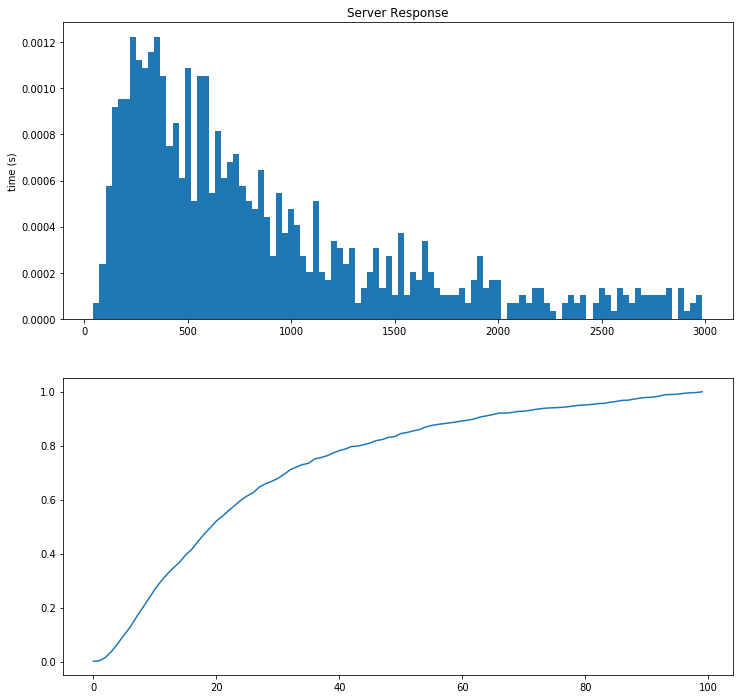

In [21]:
plt.figure(figsize=(12,12))
plt.subplot(2, 1, 1)
nbins=100
plt.hist(server_data, bins=nbins, density=True, align='mid')
plt.title('Server Response')
plt.ylabel('time (s)')

plt.subplot(2, 1, 2)
disc = ss.cumfreq(server_data, numbins=nbins)
plt.plot(disc[0]/len(server_data))

plt.show()

Box and Whisker Plots
---------------------
http://en.wikipedia.org/wiki/Box_plot  
http://matplotlib.sourceforge.net/api/pyplot_api.html#matplotlib.pyplot.boxplot

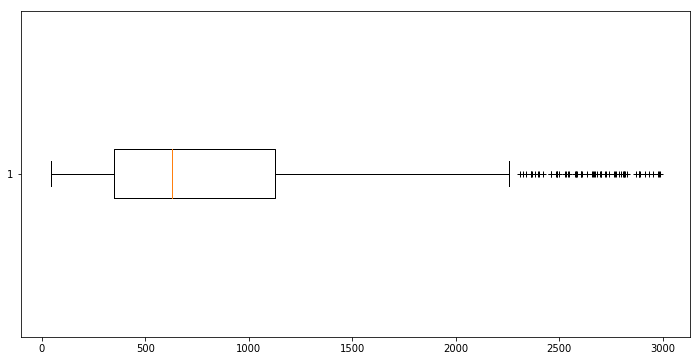

In [22]:
plt.figure(figsize=(12,6))
plt.boxplot(server_data, notch=0, sym='+', vert=0, whis=1.5, positions=None, widths=None)
plt.show()

In [23]:
#three series of data
glass_data = np.loadtxt(datapath / "glass.data.csv", usecols=(1,2,10), delimiter=',')

In [24]:
ss.describe(glass_data)

DescribeResult(nobs=214, minmax=(array([ 1.51115, 10.73   ,  1.     ]), array([ 1.53393, 17.38   ,  7.     ])), mean=array([ 1.51836542, 13.40785047,  2.78037383]), variance=array([9.22254137e-06, 6.66841367e-01, 4.42571629e+00]), skewness=array([1.61401505, 0.45099172, 1.10708511]), kurtosis=array([ 4.78935423,  2.95347658, -0.30093706]))

In [25]:
pd_glass = pd.DataFrame(glass_data)
pd_glass.describe()

,0,1,2
count,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.780374
std,0.003037,0.816604,2.103739
min,1.511150,10.730000,1.000000
25%,1.516523,12.907500,1.000000
50%,1.517680,13.300000,2.000000
75%,1.519157,13.825000,3.000000
max,1.533930,17.380000,7.000000


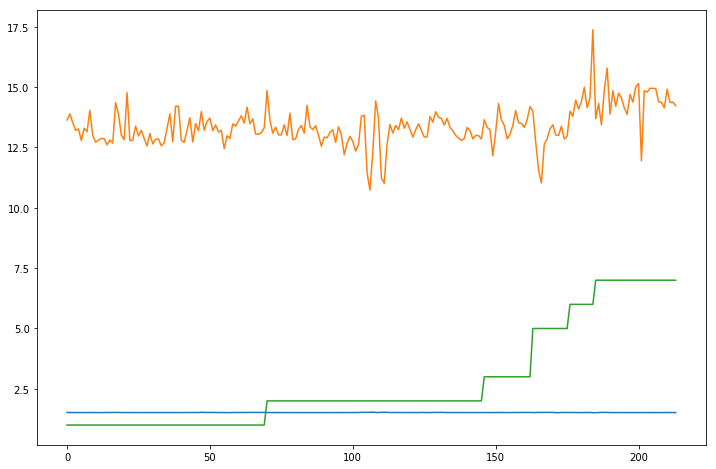

In [26]:
plt.figure(figsize=(12,8))
plt.plot(glass_data)
plt.show()

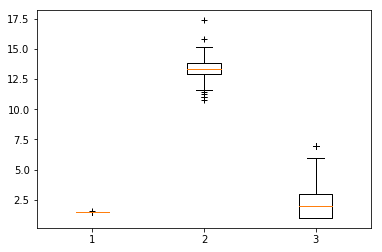

In [27]:
plt.boxplot(glass_data, notch=0, sym='+', vert=1, whis=1.5, positions=None, widths=None)
plt.show()

## Two variable graphs

Association and Causality  
Dependency and Independency  
Correlation and Covariance

A special case of two variable graphs are the time series  
http://en.wikipedia.org/wiki/Time_series  

+ Trend (linear and non-linear)
+ Seasonality (adictive and multiplicative)  
+ Noise  
+ Other(!)  


Ex: Trend and seasonality in Mauna Loa CO2 emissions  
http://www.esrl.noaa.gov/gmd/ccgg/trends/#mlo_full

In [28]:
maunaloa = pd.read_csv(datapath / 'co2_mm_mlo.txt', 
                       comment='#', 
                       delim_whitespace=True, 
                       names=['year','month','decimal date','average','interpolated','trend','#days'],
                       index_col=2)
maunaloa.head()

,year,month,average,interpolated,trend,#days
decimal date,,,,,,
1958.208,1958,3,315.71,315.71,314.62,-1
1958.292,1958,4,317.45,317.45,315.29,-1
1958.375,1958,5,317.50,317.50,314.71,-1
1958.458,1958,6,-99.99,317.10,314.85,-1
1958.542,1958,7,315.86,315.86,314.98,-1


In [29]:
maunaloa.shape

(678, 6)

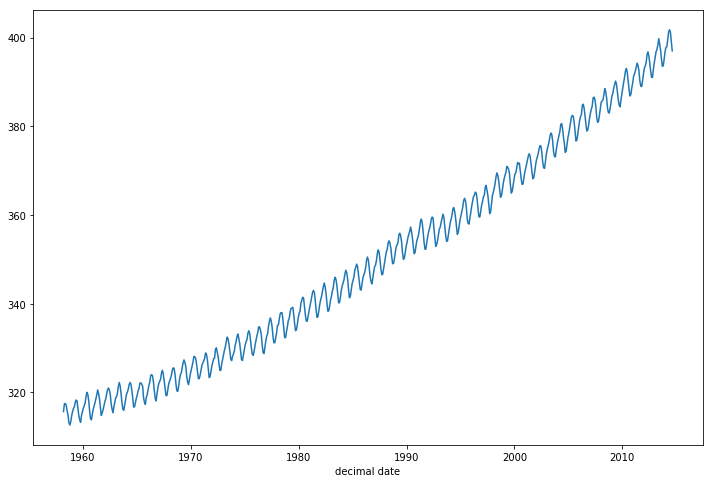

In [30]:
#maunaloa[['interpolated', 'average']].plot(figsize=(12,8))
maunaloa['interpolated'].plot(figsize=(12,8))

Treating Logarithmic Data
-------------------------
http://matplotlib.sourceforge.net/api/pyplot_api.html#matplotlib.pyplot.semilogx
    
http://matplotlib.sourceforge.net/api/pyplot_api.html#matplotlib.pyplot.semilogy

http://matplotlib.sourceforge.net/api/pyplot_api.html#matplotlib.pyplot.loglog

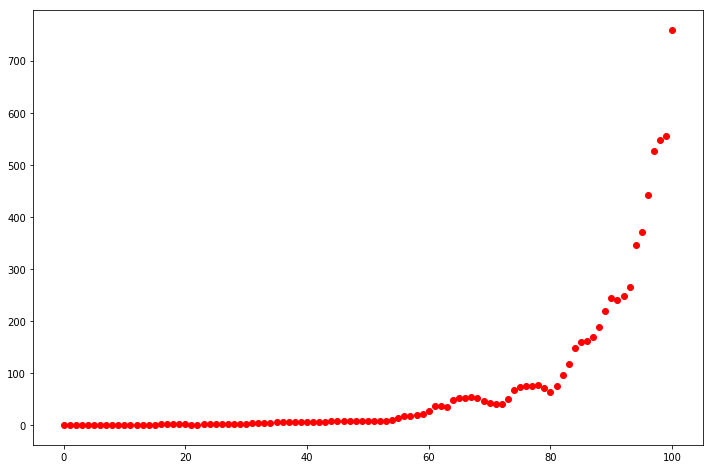

In [31]:
plt.figure(figsize=(12,8))
logexample = np.loadtxt(datapath / "logscale.csv")
plt.scatter(logexample[:,0], logexample[:,1], c='r', marker = 'o')
plt.show()

In [32]:
allo = np.loadtxt(datapath / "allometricscaling.csv", usecols=(1,2), delimiter=',')
allo

array([[9.00e+04, 6.00e+01],
       [2.00e+03, 1.50e+02],
       [5.00e+03, 9.00e+01],
       [6.00e+01, 4.50e+02],
       [1.50e+03, 2.75e+02],
       [5.00e+03, 1.90e+02],
       [1.20e+06, 4.40e+01],
       [8.00e+05, 6.50e+01],
       [1.50e+05, 7.00e+01],
       [1.00e+03, 2.05e+02],
       [5.00e+06, 3.00e+01],
       [1.20e+08, 2.00e+01]])

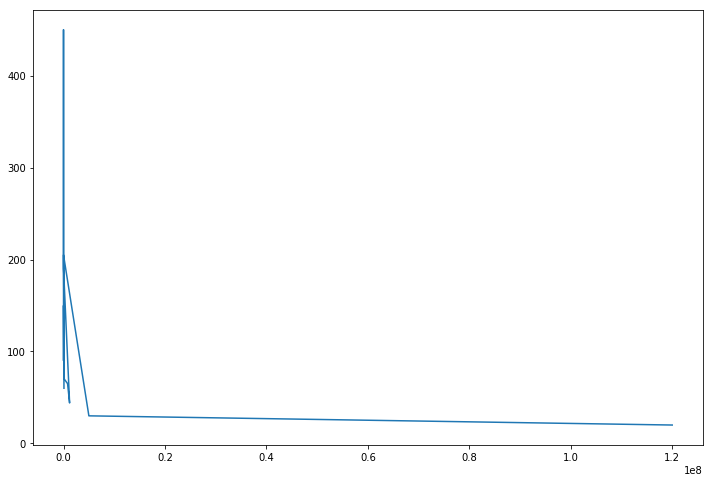

In [33]:
plt.figure(figsize=(12,8))
plt.plot(allo[:,0], allo[:,1])
plt.show()

In [34]:
print(ss.describe(allo))

DescribeResult(nobs=12, minmax=(array([60., 20.]), array([1.2e+08, 4.5e+02])), mean=array([1.06045467e+07, 1.37416667e+02]), variance=array([1.18887579e+15, 1.60191742e+04]), skewness=array([3.00603781, 1.34277389]), kurtosis=array([7.0572155 , 1.02788929]))


In [35]:
allo.shape

(12, 2)

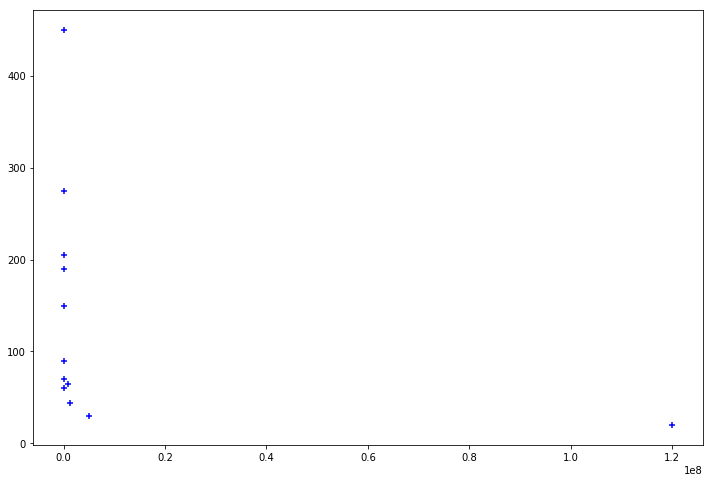

In [36]:
plt.figure(figsize=(12,8))
#plt.scatter(allo[:,0], allo[:,1])
plt.scatter(allo[:,0], allo[:,1], c='b', marker='+')
plt.show()

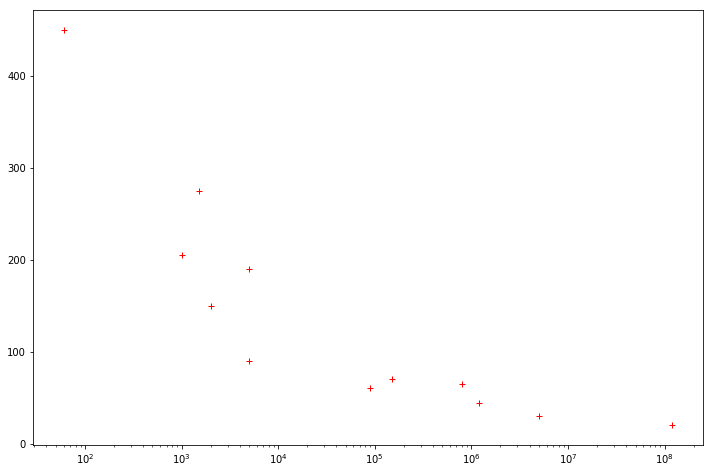

In [37]:
plt.figure(figsize=(12,8))
plt.semilogx(allo[:,0], allo[:,1], c='r', marker='+', ls='none')
plt.show()

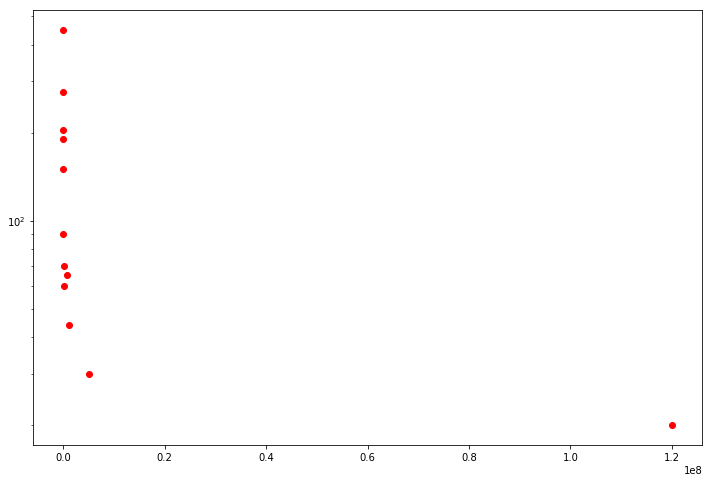

In [38]:
plt.figure(figsize=(12,8))
plt.semilogy(allo[:,0], allo[:,1], c='r', marker='o', ls='none')
plt.show()

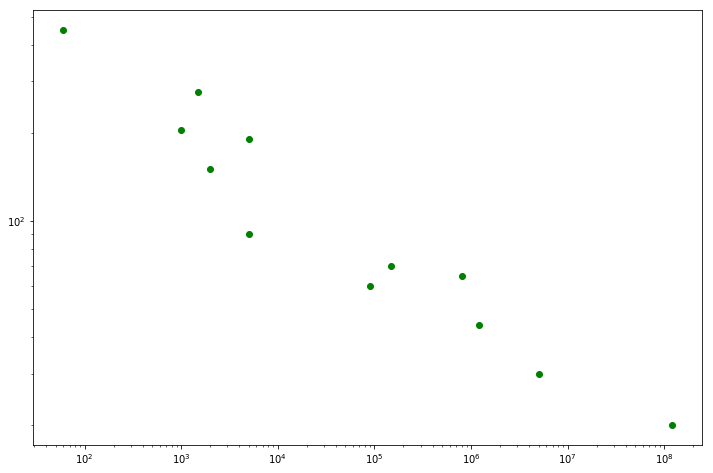

In [39]:
plt.figure(figsize=(12,8))
plt.loglog(allo[:,0], allo[:,1], c='g', marker='o', ls='none')
plt.show()

Smoothing with moving averages
------------------------------
http://matplotlib.sourceforge.net/api/mlab_api.html

The draft Lottery of 1969  
https://en.wikipedia.org/wiki/Draft_lottery_(1969)

In [40]:
lottery = pd.read_csv(datapath / "draft_lottery.csv", skiprows=38, sep="\t", usecols=[3,4])
lottery.head()

,Day_of_year,Draft_No.
0,1,305
1,2,159
2,3,251
3,4,215
4,5,101


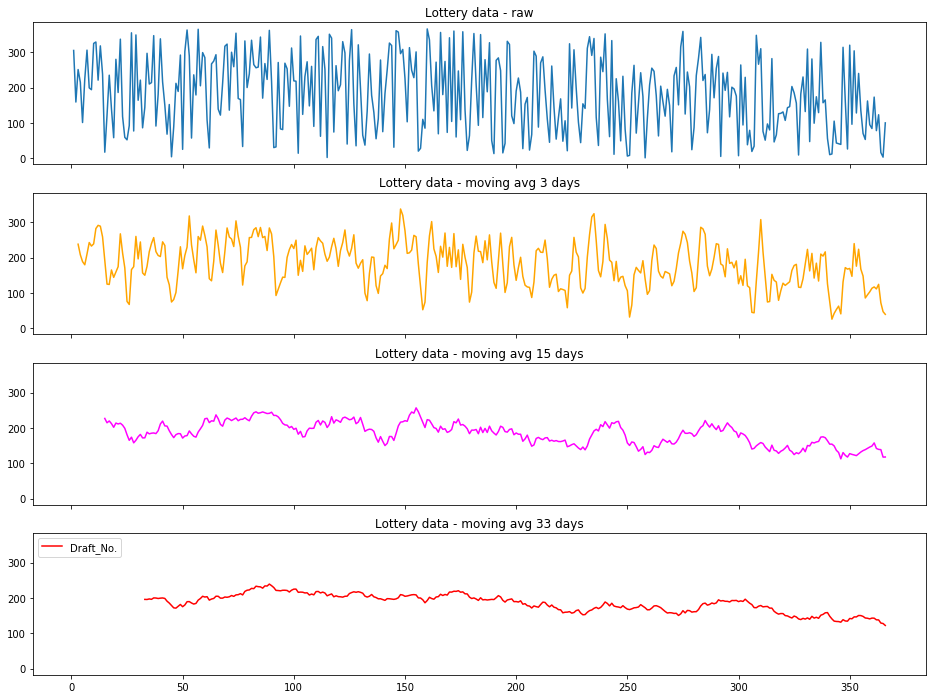

In [41]:
rolling_mean = lottery["Draft_No."].rolling(window=20).mean()
rolling_mean2 = lottery["Draft_No."].rolling(window=50).mean()

f, ax = plt.subplots(nrows=4, ncols=1, figsize=(16,12), sharex=True, sharey=True)
plt.setp([a.get_xticklabels() for a in f.axes[:-1]], visible=False)
ax[0].plot(lottery.Day_of_year, lottery["Draft_No."], label='Lottery data - raw')
ax[0].set_title('Lottery data - raw')
ax[1].plot(lottery.Day_of_year, lottery["Draft_No."].rolling(window=3).mean(), color='orange')
ax[1].set_title('Lottery data - moving avg 3 days')
ax[2].plot(lottery.Day_of_year, lottery["Draft_No."].rolling(window=15).mean(), color='magenta')
ax[2].set_title('Lottery data - moving avg 15 days')
ax[3].plot(lottery.Day_of_year, lottery["Draft_No."].rolling(window=33).mean(), color='red')
ax[3].set_title('Lottery data - moving avg 33 days')
plt.legend(loc='upper left')
#f.subplots_adjust(hspace=0)
plt.show()

In [42]:
sunspot = pd.read_csv(datapath / "sunspot_yearnum.dat", header=None, delim_whitespace=True, names=["years","measurements"])
sunspot.set_index("years", drop=True, inplace=True)
sunspot.head()

,measurements
years,
1610,0.0
1611,0.2
1612,1.5
1613,0.4
1614,0.0


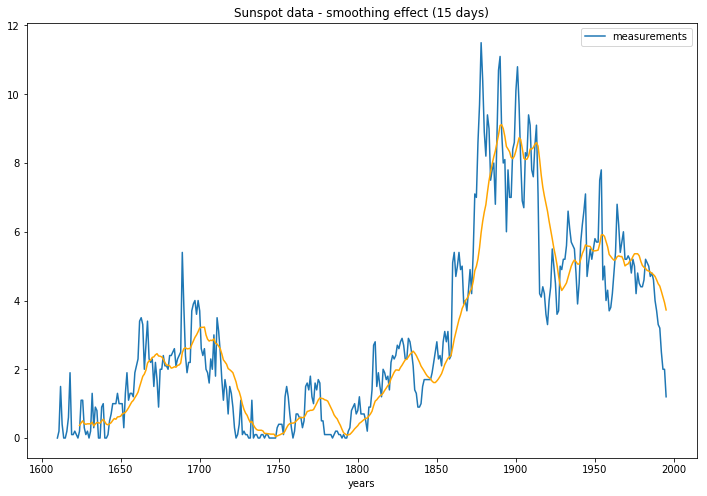

In [43]:
f, ax = plt.subplots(nrows=1, ncols=1, figsize=(12,6))
sunspot.plot(ax=ax, figsize=(12,8))
ax.plot(sunspot.rolling(window=15).mean(), color='orange')
plt.title('Sunspot data - smoothing effect (15 days)')
plt.show()

Filtering - Residuals
---------------------

One way of finding patterns remaining in data after applying some smoothing technique is to subtract the smoothed data from the original data, and try to fing some residuals. If there are some, that means that our smoothing function didn't capture all the information from the original signal.
 
http://en.wikipedia.org/wiki/Errors_and_residuals_in_statistics  
http://docs.scipy.org/doc/numpy/reference/generated/numpy.subtract.html  
http://en.wikipedia.org/wiki/Filter_(signal_processing)

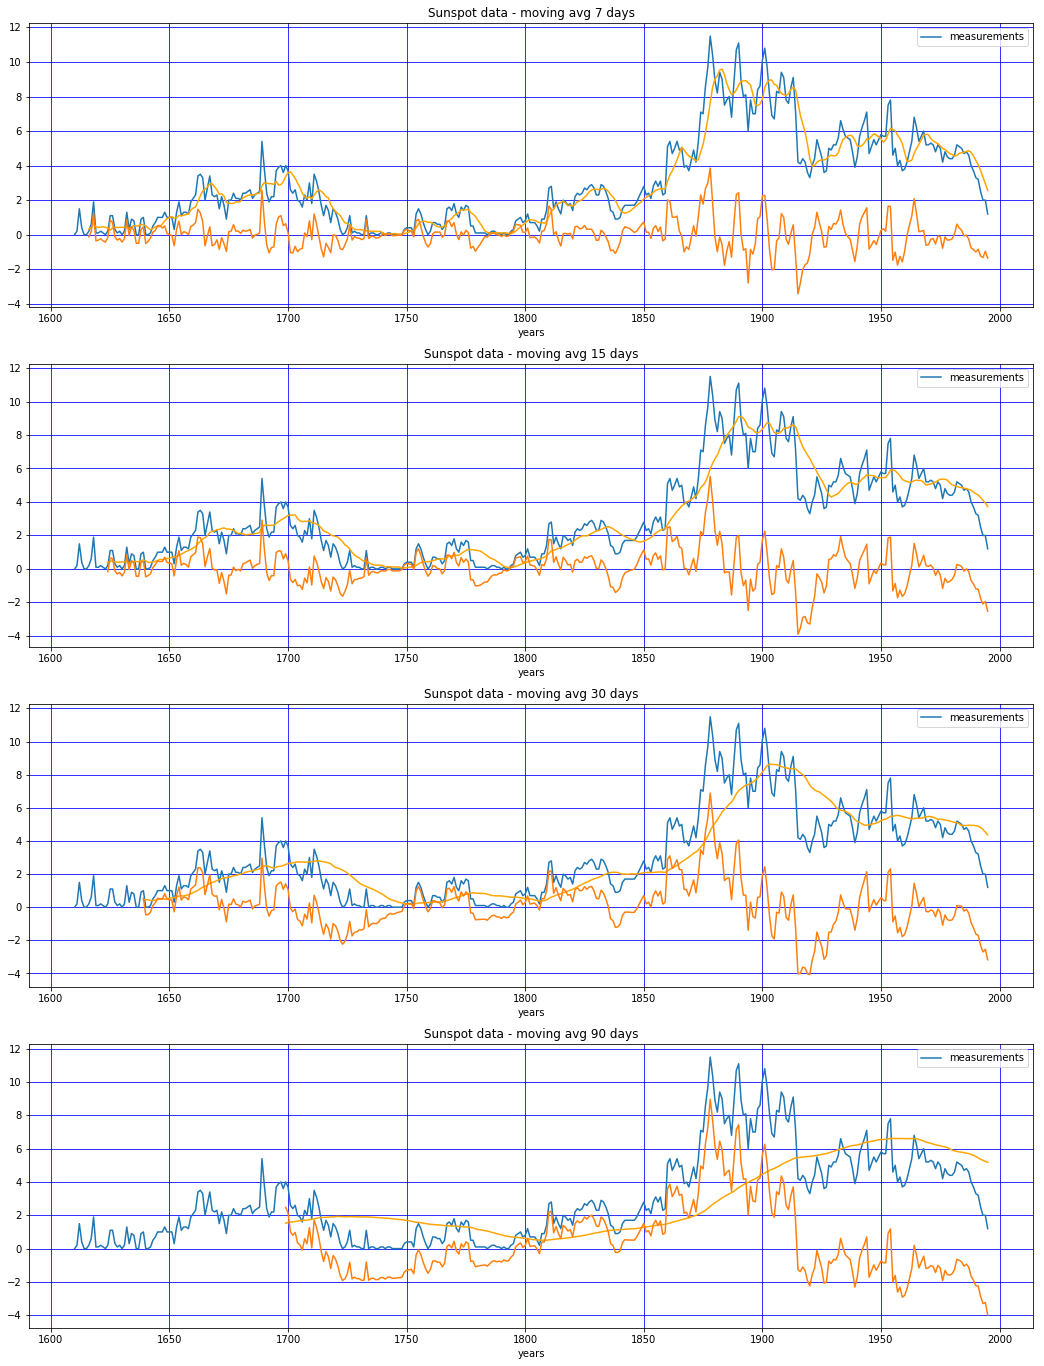

In [44]:
f, ax = plt.subplots(nrows=4, ncols=1, figsize=(18,24))

sunspot.plot(ax=ax[0])
ax[0].plot(sunspot.rolling(window=7).mean(), color='orange')
ax[0].plot(np.subtract(sunspot,sunspot.rolling(window=7).mean()))
ax[0].grid(b=True, which='major', color='b', linestyle='-')
ax[0].set_title('Sunspot data - moving avg 7 days')

sunspot.plot(ax=ax[1])
ax[1].plot(sunspot.rolling(window=15).mean(), color='orange')
ax[1].plot(np.subtract(sunspot,sunspot.rolling(window=15).mean()))
ax[1].grid(b=True, which='major', color='b', linestyle='-')
ax[1].set_title('Sunspot data - moving avg 15 days')

sunspot.plot(ax=ax[2])
ax[2].plot(sunspot.rolling(window=30).mean(), color='orange')
ax[2].plot(np.subtract(sunspot,sunspot.rolling(window=30).mean()))
ax[2].grid(b=True, which='major', color='b', linestyle='-')
ax[2].set_title('Sunspot data - moving avg 30 days')

sunspot.plot(ax=ax[3])
ax[3].plot(sunspot.rolling(window=90).mean(), color='orange')
ax[3].plot(np.subtract(sunspot,sunspot.rolling(window=90).mean()))
ax[3].grid(b=True, which='major', color='b', linestyle='-')
ax[3].set_title('Sunspot data - moving avg 90 days')

plt.show()

Linear and Polynomial Regressions
---------------------------------
http://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.linregress.html      
http://www.scipy.org/Cookbook/LinearRegression      

http://en.wikipedia.org/wiki/Linear_regression  
http://en.wikipedia.org/wiki/Polynomial_regression  

Using Pylab's linear regression

[2.3 0.5]
[2.8 5.1 7.4 9.7]
[2.8 5.1 7.4 9.7]


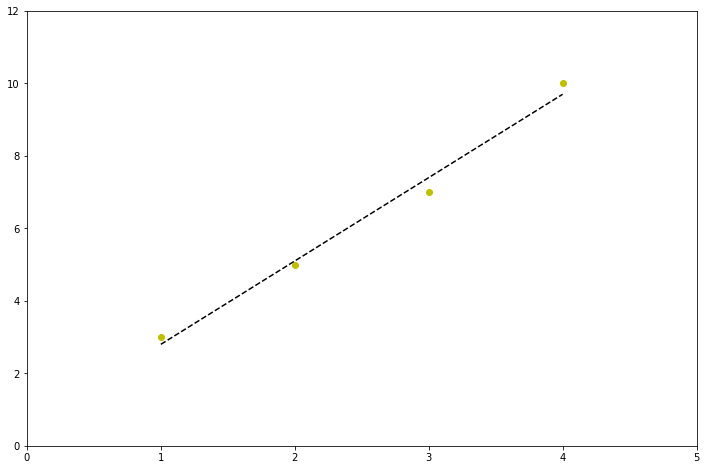

slope is: 2.3
intercept: is 0.5
r_value is: 0.9943767126843689
r_squared is: 0.99
p_value is: 0.0056232873156311074
std_err is: 0.1732050807568879


In [45]:
x = [1,2,3,4]
y = [3,5,7,10] # 10, not 9, so the fit isn't perfect

fit = pl.polyfit(x,y,1) # 1 is the degree of polynomial
fit_fn = pl.poly1d(fit) # fit_fn is now a function which takes in x and returns an estimate for y
val_fn = pl.polyval(fit, x) #val_fn are the values predicted by that function
print(fit)
print(fit_fn(x))
print(val_fn)    #are the same

plt.figure(figsize=(12,8))
plt.plot(x,y, 'yo')
#plt.plot(x, fit_fn(x), '--k')
plt.plot(x, val_fn, '--k')
plt.xlim(0, 5)
plt.ylim(0, 12)
plt.show()

slope, intercept, r_value, p_value, std_err = ss.linregress(x,y)
print('slope is: {}'.format(slope))
print('intercept: is {}'.format(intercept))
print('r_value is: {}'.format(r_value))
print('r_squared is: {:.2f}'.format(r_value**2))
print('p_value is: {}'.format(p_value))
print('std_err is: {}'.format(std_err))

#### Be careful with regressions!  

http://matplotlib.org/1.2.1/examples/pylab_examples/anscombe.html  
    
Edward Tufte uses this example from Anscombe to show 4 datasets of x and y that have the same mean, standard deviation, and regression line, but which are qualitatively different.

mean=7.50, std=1.94, r=0.82
mean=7.50, std=1.94, r=0.82
mean=7.50, std=1.94, r=0.82
mean=7.50, std=1.94, r=0.82


<Figure size 432x288 with 0 Axes>

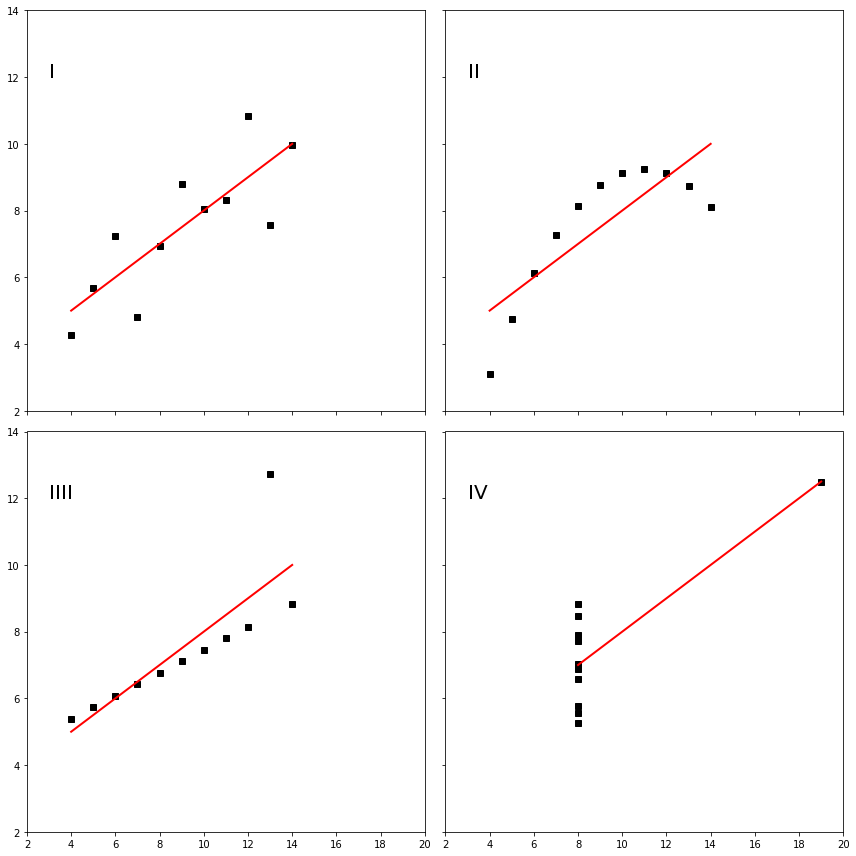

In [46]:
x =  np.array([10, 8, 13, 9, 11, 14, 6, 4, 12, 7, 5])
y1 = np.array([8.04, 6.95, 7.58, 8.81, 8.33, 9.96, 7.24, 4.26, 10.84, 4.82, 5.68])
y2 = np.array([9.14, 8.14, 8.74, 8.77, 9.26, 8.10, 6.13, 3.10, 9.13, 7.26, 4.74])
y3 = np.array([7.46, 6.77, 12.74, 7.11, 7.81, 8.84, 6.08, 5.39, 8.15, 6.42, 5.73])
x4 = np.array([8,8,8,8,8,8,8,19,8,8,8])
y4 = np.array([6.58,5.76,7.71,8.84,8.47,7.04,5.25,12.50,5.56,7.91,6.89])

def fit(x):
    return 3+0.5*x

plt.clf()
f, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(12,12), sharex='col', sharey='row')

xfit = np.array([np.amin(x),np.amax(x)])
ax1.plot(x,y1,'ks', xfit, fit(xfit), 'r-', lw=2)
ax1.axis([2,20,2,14])
ax1.text(3,12, 'I', fontsize=20)

ax2.plot(x,y2,'ks', xfit, fit(xfit), 'r-', lw=2)
ax2.axis([2,20,2,14])
ax2.text(3,12, 'II', fontsize=20)

ax3.plot(x,y3,'ks', xfit, fit(xfit), 'r-', lw=2)
ax3.axis([2,20,2,14])
ax3.text(3,12, 'IIII', fontsize=20)

xfit = np.array([np.amin(x4),np.amax(x4)])
ax4.plot(x4,y4,'ks', xfit, fit(xfit), 'r-', lw=2)
ax4.axis([2,20,2,14])
ax4.text(3,12, 'IV', fontsize=20)

plt.tight_layout()

#verify the stats
pairs = (x,y1), (x,y2), (x,y3), (x4,y4)
for x,y in pairs:
    print('mean={:.2f}, std={:.2f}, r={:.2f}'.format(np.mean(y), np.std(y), np.corrcoef(x,y)[0][1]))
plt.show()

Analysing the Boston Marathon results  
http://en.wikipedia.org/wiki/List_of_winners_of_the_Boston_Marathon

In [47]:
marathon_m = np.genfromtxt(datapath / "marathon.csv", usecols=(0,4), delimiter=',')
marathon_w = np.genfromtxt(datapath / "marathon.csv", usecols=(0,8), delimiter=',', skip_header=69)

In [48]:
t1 = np.linspace(1897,2014,len(marathon_m[:,0]))
t2 = np.linspace(1960,2014,len(marathon_w[:,0]))

In [49]:
s_m = pd.Series(marathon_m[:,1], index=marathon_m[:,0], name='Men')
s_w = pd.Series(marathon_w[:,1], index=marathon_w[:,0])
df_m_w = pd.concat([s_m,s_w], axis=1, keys=['Men','Women'])
df_m_w.tail()

,Men,Women
2010.0,125.866667,146.183333
2011.0,123.033333,142.600000
2012.0,132.666667,151.833333
2013.0,130.366667,146.416667
2014.0,128.616667,138.950000


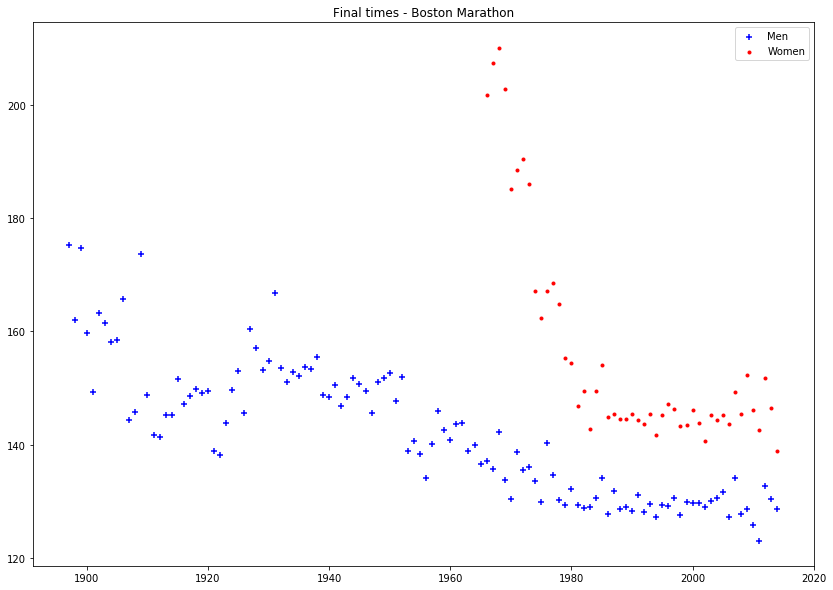

In [50]:
plt.figure(figsize=(14,10))
plt.scatter(marathon_m[:,0], marathon_m[:,1], c='b', marker='+')
plt.scatter(marathon_w[:,0], marathon_w[:,1], c='r', marker='.')
plt.title('Final times - Boston Marathon')
plt.legend(['Men','Women'])
plt.show()

Linear Regression

In [51]:
(a,b) = pl.polyfit(t1,marathon_m[:,1],1) 
xm_linear = pl.polyval([a,b],t1)
(a,b) = pl.polyfit(t2,marathon_w[:,1],1)
xf_linear = pl.polyval([a,b],t2)

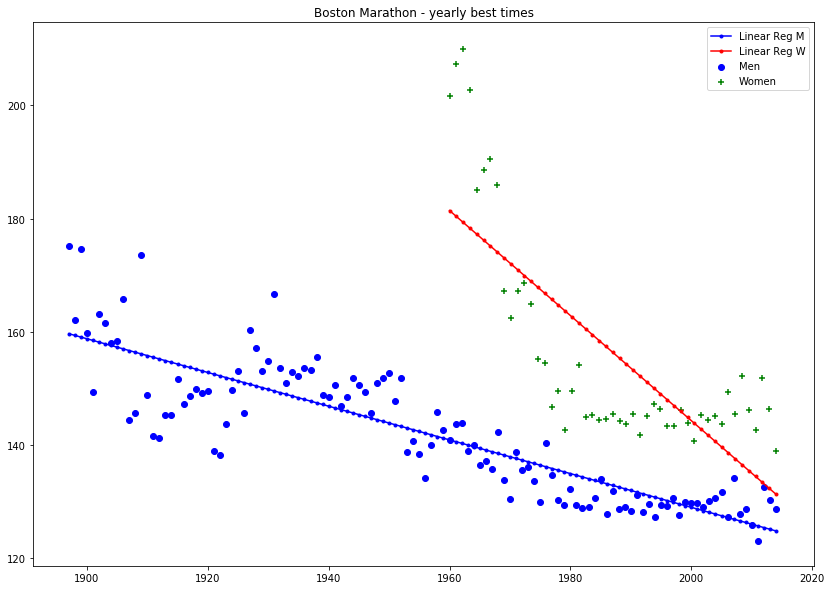

In [52]:
plt.figure(figsize=(14,10))
plt.title('Boston Marathon - yearly best times')
plt.scatter(t1, marathon_m[:,1], c='b', marker='o')
plt.scatter(t2, marathon_w[:,1], c='g', marker='+')
plt.plot(t1, xm_linear,'b.-')
plt.plot(t2, xf_linear,'r.-')
plt.legend(['Linear Reg M','Linear Reg W','Men','Women'], loc=0)
plt.show()

Regression with 2th order polynomial

In [53]:
(a,b,c) = pl.polyfit(t1,marathon_m[:,1],2)
xm_2th = pl.polyval([a,b,c],t1)
(a,b,c) = pl.polyfit(t2,marathon_w[:,1],2)
xw_2th = pl.polyval([a,b,c],t2)

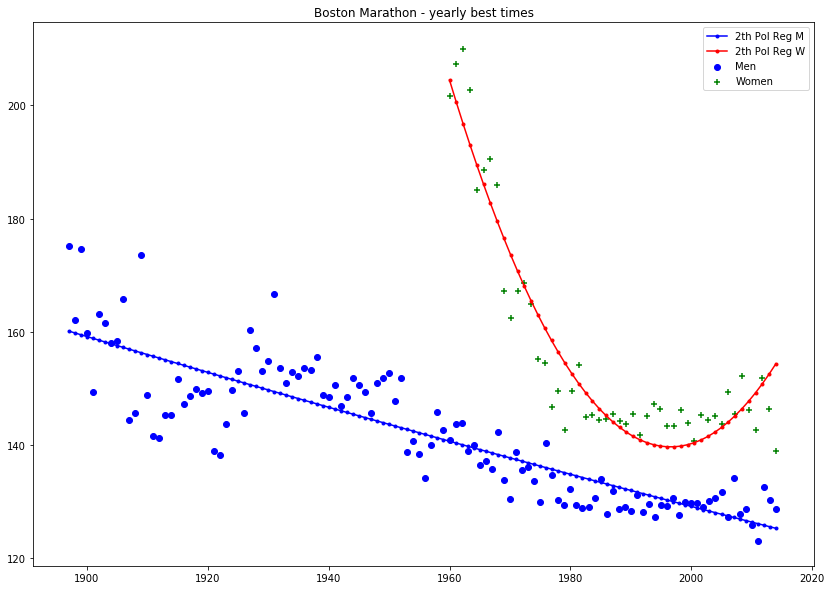

In [54]:
plt.figure(figsize=(14,10))
plt.title('Boston Marathon - yearly best times')
plt.scatter(t1, marathon_m[:,1], c='b', marker='o')
plt.scatter(t2, marathon_w[:,1], c='g', marker='+')
plt.plot(t1, xm_2th,'b.-')
plt.plot(t2, xw_2th,'r.-')
plt.legend(['2th Pol Reg M','2th Pol Reg W','Men','Women'], loc=0)
plt.show()

Regression with 3rd order polynomial

In [55]:
coefs_m = pl.polyfit(t1,marathon_m[:,1],3) 
xm_3th = pl.polyval(coefs_m,t1)
coefs_w = pl.polyfit(t2,marathon_w[:,1],3)
xw_3th = pl.polyval(coefs_w,t2)

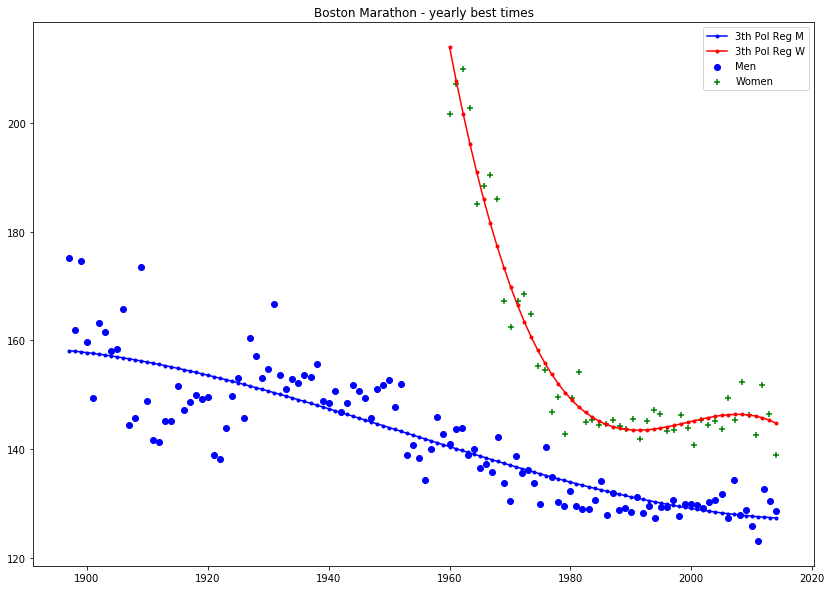

In [56]:
plt.figure(figsize=(14,10))
plt.title('Boston Marathon - yearly best times')
plt.scatter(t1, marathon_m[:,1], c='b', marker='o')
plt.scatter(t2, marathon_w[:,1], c='g', marker='+')
plt.plot(t1, xm_3th,'b.-')
plt.plot(t2, xw_3th,'r.-')
plt.legend(['3th Pol Reg M','3th Pol Reg W','Men','Women'], loc=0)
plt.show()

Regression with 4th order polynomial

In [57]:
coefs_m = pl.polyfit(t1,marathon_m[:,1],4) 
xm_4th = pl.polyval(coefs_m,t1)
coefs_w = pl.polyfit(t2,marathon_w[:,1],4)
xw_4th = pl.polyval(coefs_w,t2)

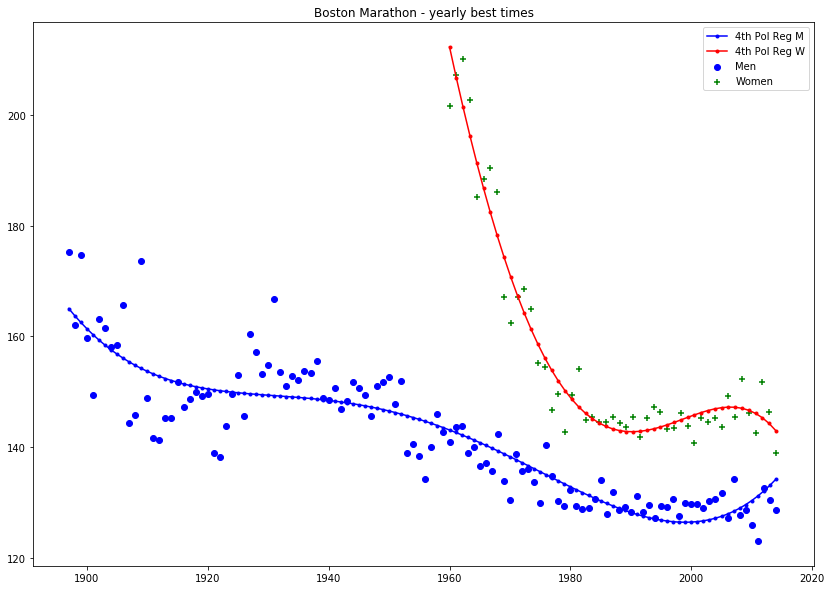

In [58]:
plt.figure(figsize=(14,10))
plt.title('Boston Marathon - yearly best times')
plt.scatter(t1, marathon_m[:,1], c='b', marker='o')
plt.scatter(t2, marathon_w[:,1], c='g', marker='+')
plt.plot(t1, xm_4th,'b.-')
plt.plot(t2, xw_4th,'r.-')
plt.legend(['4th Pol Reg M','4th Pol Reg W','Men','Women'], loc=0)
plt.show()

Linear regression in The Draft Lottery case:

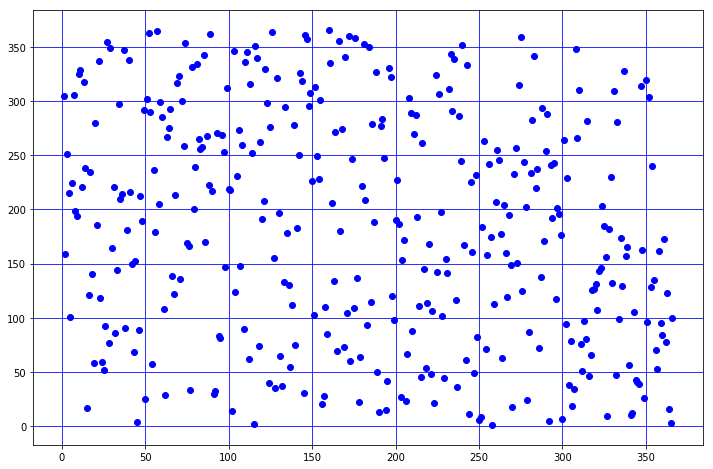

In [59]:
plt.figure(figsize=(12,8))
plt.scatter(lottery.iloc[:,0], lottery.iloc[:,1], c='b', marker='o')
plt.grid(b=True, which='major', color='b', linestyle='-')
plt.show()

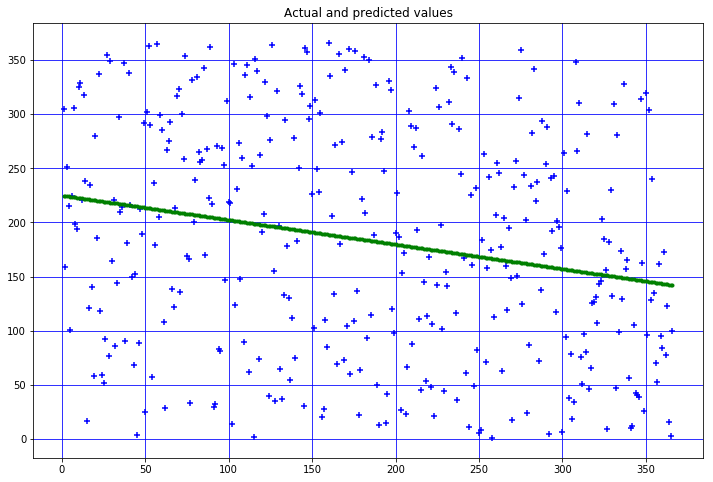

slope is: -0.22605939968829758
intercept: is 225.0092222471742
r_value is: -0.22604142701100727
r_squared is: 0.05
p_value is: 1.2638292721939644e-05
std_err is: 0.05106169978260039


In [60]:
plt.figure(figsize=(12,8))
plt.scatter(lottery.iloc[:,0], lottery.iloc[:,1], c='b', marker='+')

slope, intercept, r_value, p_value, std_err = ss.linregress(lottery.iloc[:,0],lottery.iloc[:,1])
draft_linear = pl.polyval([slope,intercept],lottery.iloc[:,0])
plt.plot(lottery.iloc[:,0], draft_linear,'g.')

plt.title('Actual and predicted values')
plt.grid(b=True, which='major', color='b', linestyle='-')
plt.show()

print('slope is: {}'.format(slope))
print('intercept: is {}'.format(intercept))
print('r_value is: {}'.format(r_value))
print('r_squared is: {:.2f}'.format(r_value**2))
print('p_value is: {}'.format(p_value))
print('std_err is: {}'.format(std_err))

#### Analysis of residuals

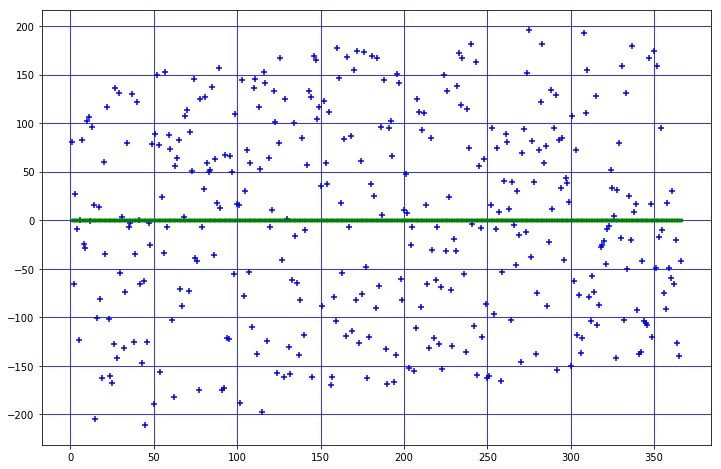

slope is: -2.493213260351512e-17
intercept: is 2.0900881311796468e-15
r_value is: -2.559254457517204e-17
r_squared is: 0.00
p_value is: 0.9999999999999996
std_err is: 0.051061699782600396


In [61]:
plt.figure(figsize=(12,8))

res = np.subtract(lottery.iloc[:,1], draft_linear)
plt.scatter(lottery.iloc[:,0], res, c='b', marker='+')

slope, intercept, r_value, p_value, std_err = ss.linregress(lottery.iloc[:,0],res)
res_linear = pl.polyval([slope,intercept],lottery.iloc[:,0])
plt.plot(lottery.iloc[:,0], res_linear,'g.')

plt.grid(b=True, which='major', color='b', linestyle='-')
plt.show()

print('slope is: {}'.format(slope))
print('intercept: is {}'.format(intercept))
print('r_value is: {}'.format(r_value))
print('r_squared is: {:.2f}'.format(r_value**2))
print('p_value is: {}'.format(p_value))
print('std_err is: {}'.format(std_err))

#### Exploring Bovespa stock prices

In [62]:
cotacoes = pd.read_csv(datapath / "cotacoesbovespa.txt")
print(cotacoes.shape)
cotacoes.head()

(4513, 7)


,Date,Open,High,Low,Close,Volume,Adj Close
0,2011-07-25,60264.0,60285.0,59640.0,59971.0,1772400,59971.0
1,2011-07-22,60263.0,60696.0,60077.0,60270.0,1809600,60270.0
2,2011-07-21,59120.0,60441.0,59120.0,60263.0,2159600,60263.0
3,2011-07-20,59094.0,59552.0,59045.0,59120.0,1946000,59120.0
4,2011-07-19,58838.0,59394.0,58677.0,59082.0,1888000,59082.0


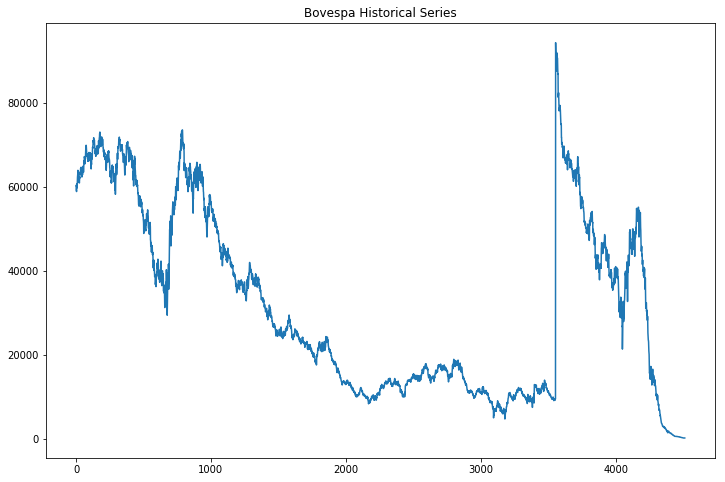

In [63]:
plt.figure(figsize=(12,8))
plt.plot(cotacoes['Open'])
plt.title('Bovespa Historical Series')
plt.show()

We can see there is a great scale change... maybe it's a good idea to treat as two separate series

In [64]:
cotacoes.index

RangeIndex(start=0, stop=4513, step=1)

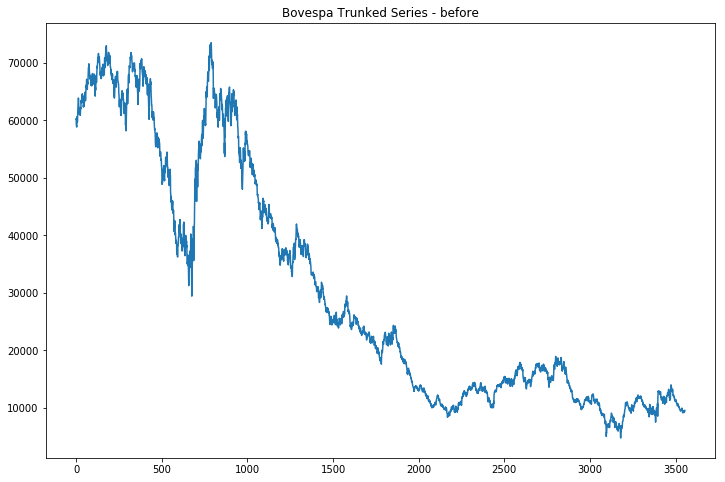

In [65]:
cotacoes_before = cotacoes.iloc[0:3554,1].values

plt.figure(figsize=(12,8))
plt.title('Bovespa Trunked Series - before')
plt.plot(cotacoes_before)
plt.show()

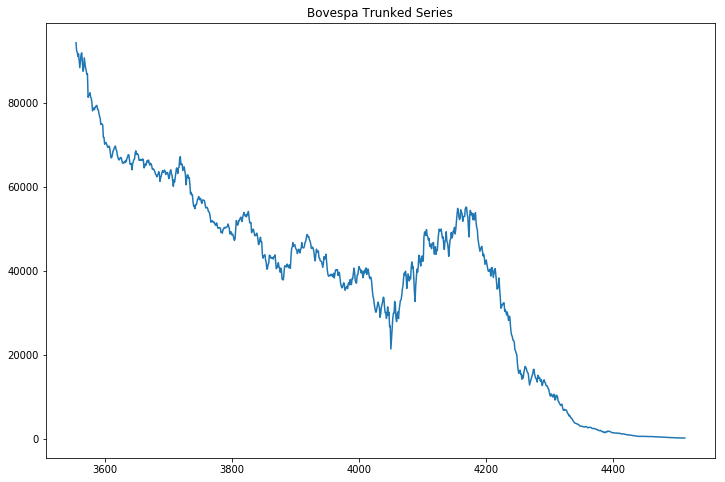

In [66]:
plt.figure(figsize=(12,8))
plt.title('Bovespa Trunked Series')
plt.plot(cotacoes.iloc[3555:,1])
plt.show()

Smoothing with a gaussian filter
--------------------------------
https://stackoverflow.com/questions/27099555/gaussian-kernel-density-smoothing-for-pandas-dataframe-resample

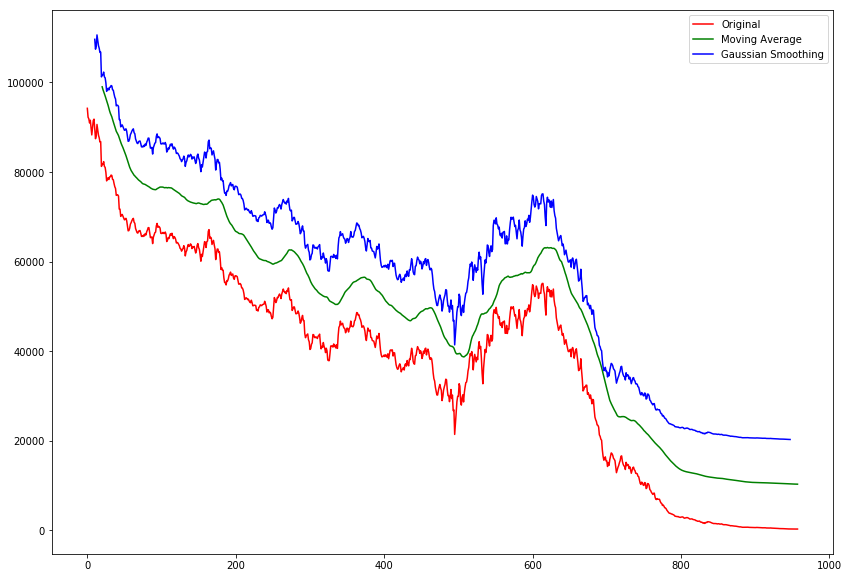

In [99]:
plt.figure(figsize=(14,10))

plt.plot(np.arange(len(cotacoes.iloc[3555:,1])), cotacoes.iloc[3555:,1],'r')

plt.plot(np.arange(len(cotacoes.iloc[3555:,1])), cotacoes.iloc[3555:,1].rolling(window=21).mean()+10000, 'g')

plt.plot(np.arange(len(cotacoes.iloc[3555:,1])), 
         cotacoes.iloc[3555:,1].rolling(window=21, win_type='gaussian', center=True).mean(std=0.1)+20000, 'b')

plt.legend(['Original','Moving Average','Gaussian Smoothing'], loc=0)
plt.show()

Calculating Cross-Correlation  
http://en.wikipedia.org/wiki/Cross-correlation  
http://stackoverflow.com/questions/15989384/cross-correlation-of-non-periodic-function-with-numpy  

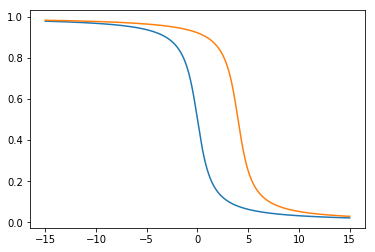

In [68]:
x = np.linspace(-15, 15, 4000)
f1 = (np.arctan(-x) + np.pi/2) / np.pi
f2 = (np.arctan(-x + 4) + np.pi/2) / np.pi
plt.plot(x,f1)
plt.plot(x,f2)
plt.show()

peak correlation occurs at: -3.747186796699175


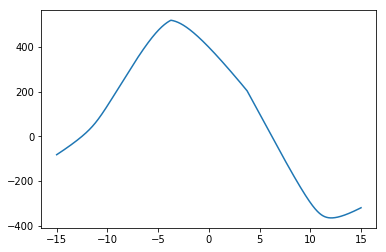

In [69]:
L4 = int(len(f2)/8)
sf2 = f2[L4:-L4]
c = pl.correlate(f1-np.mean(f1), sf2-np.mean(f1), 'same')
print("peak correlation occurs at:", x[np.argmax(c)])  # -3.7471867967
plt.plot(x,c)
plt.show()

### Bank.arff

In [70]:
bank = loadarff(os.path.join(datapath,"bank.arff"))
df_bank = pd.DataFrame(bank[0])
df_bank.head()

,age,sex,region,income,married,children,car,save_act,current_act,mortgage,pep
0,48.0,b'FEMALE',b'INNER_CITY',17546.0,b'NO',b'1',b'NO',b'NO',b'NO',b'NO',b'YES'
1,40.0,b'MALE',b'TOWN',30085.1,b'YES',b'3',b'YES',b'NO',b'YES',b'YES',b'NO'
2,51.0,b'FEMALE',b'INNER_CITY',16575.4,b'YES',b'0',b'YES',b'YES',b'YES',b'NO',b'NO'
3,23.0,b'FEMALE',b'TOWN',20375.4,b'YES',b'3',b'NO',b'NO',b'YES',b'NO',b'NO'
4,57.0,b'FEMALE',b'RURAL',50576.3,b'YES',b'0',b'NO',b'YES',b'NO',b'NO',b'NO'


In [71]:
df_bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          600 non-null    float64
 1   sex          600 non-null    object 
 2   region       600 non-null    object 
 3   income       600 non-null    float64
 4   married      600 non-null    object 
 5   children     600 non-null    object 
 6   car          600 non-null    object 
 7   save_act     600 non-null    object 
 8   current_act  600 non-null    object 
 9   mortgage     600 non-null    object 
 10  pep          600 non-null    object 
dtypes: float64(2), object(9)
memory usage: 51.7+ KB


In [72]:
features = set(df_bank.columns)
features -= set(['age','income']) # only categorical values
features

{'car',
 'children',
 'current_act',
 'married',
 'mortgage',
 'pep',
 'region',
 'save_act',
 'sex'}

In [73]:
for feature in features:
    print(u'Feature {} has unique values: {}'.format(feature, df_bank[feature].unique()))

Feature sex has unique values: [b'FEMALE' b'MALE']
Feature married has unique values: [b'NO' b'YES']
Feature save_act has unique values: [b'NO' b'YES']
Feature mortgage has unique values: [b'NO' b'YES']
Feature region has unique values: [b'INNER_CITY' b'TOWN' b'RURAL' b'SUBURBAN']
Feature current_act has unique values: [b'NO' b'YES']
Feature car has unique values: [b'NO' b'YES']
Feature pep has unique values: [b'YES' b'NO']
Feature children has unique values: [b'1' b'3' b'0' b'2']


#### Discretizing Data

In [74]:
df_bank2 = df_bank.copy()

df_bank2.children = df_bank.children.map(int)
df_bank2.age = df_bank.age.map(int)

dict_convert_true_false = {b'YES': 1, b'NO': 0}
df_bank2['married'] = df_bank['married'].map(dict_convert_true_false)
df_bank2['save_act'] = df_bank['save_act'].map(dict_convert_true_false)
df_bank2['current_act'] = df_bank['current_act'].map(dict_convert_true_false)
df_bank2['mortgage'] = df_bank['mortgage'].map(dict_convert_true_false)
df_bank2['pep'] = df_bank['pep'].map(dict_convert_true_false)
df_bank2['car'] = df_bank['car'].map(dict_convert_true_false)

dict_convert_gender = {b'FEMALE':1, b'MALE':0}
df_bank2['sex'] = df_bank['sex'].map(dict_convert_gender)

dict_convert_region = {b'INNER_CITY':0, b'TOWN':1, b'SUBURBAN':2, b'RURAL':3}
df_bank2['region'] = df_bank['region'].map(dict_convert_region)

In [75]:
df_bank2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          600 non-null    int64  
 1   sex          600 non-null    int64  
 2   region       600 non-null    int64  
 3   income       600 non-null    float64
 4   married      600 non-null    int64  
 5   children     600 non-null    int64  
 6   car          600 non-null    int64  
 7   save_act     600 non-null    int64  
 8   current_act  600 non-null    int64  
 9   mortgage     600 non-null    int64  
 10  pep          600 non-null    int64  
dtypes: float64(1), int64(10)
memory usage: 51.7 KB


In [76]:
df_bank2.head()

,age,sex,region,income,married,children,car,save_act,current_act,mortgage,pep
0,48,1,0,17546.0,0,1,0,0,0,0,1
1,40,0,1,30085.1,1,3,1,0,1,1,0
2,51,1,0,16575.4,1,0,1,1,1,0,0
3,23,1,1,20375.4,1,3,0,0,1,0,0
4,57,1,3,50576.3,1,0,0,1,0,0,0


In [77]:
byPEP = df_bank2.groupby(['pep'])
byPEP.describe().T

pep                      0           1
age      count  326.000000  274.000000
         mean    40.098160   45.127737
         std     14.123506   14.327991
         min     18.000000   18.000000
         25%     27.000000   34.000000
...                    ...         ...
mortgage min      0.000000    0.000000
         25%      0.000000    0.000000
         50%      0.000000    0.000000
         75%      1.000000    1.000000
         max      1.000000    1.000000

[80 rows x 2 columns]

In [78]:
byPEP.describe()

age                                                        sex  \
     count       mean        std   min   25%   50%   75%   max  count   
pep                                                                     
0    326.0  40.098160  14.123506  18.0  27.0  40.0  51.0  67.0  326.0   
1    274.0  45.127737  14.327991  18.0  34.0  45.0  58.0  67.0  274.0   

               ... current_act      mortgage                                \
         mean  ...         75%  max    count      mean       std  min  25%   
pep            ...                                                           
0    0.521472  ...         1.0  1.0    326.0  0.358896  0.480414  0.0  0.0   
1    0.474453  ...         1.0  1.0    274.0  0.335766  0.473122  0.0  0.0   

                    
     50%  75%  max  
pep                 
0    0.0  1.0  1.0  
1    0.0  1.0  1.0  

[2 rows x 80 columns]

In [79]:
df_bank2[(df_bank2.sex == 0) & (df_bank2.pep == 0)].describe()

,age,sex,region,income,married,children,car,save_act,current_act,mortgage,pep
count,156.00000,156.0,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.0
mean,39.00641,0.0,0.974359,24292.705449,0.737179,1.083333,0.474359,0.724359,0.743590,0.397436,0.0
std,13.59103,0.0,1.095143,11756.606525,0.441583,1.180259,0.500950,0.448276,0.438057,0.490944,0.0
min,18.00000,0.0,0.000000,5014.210000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
25%,26.00000,0.0,0.000000,14601.425000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
50%,39.00000,0.0,1.000000,22172.400000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.0
75%,48.00000,0.0,1.250000,31959.950000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,0.0
max,67.00000,0.0,3.000000,57671.700000,1.000000,3.000000,1.000000,1.000000,1.000000,1.000000,0.0


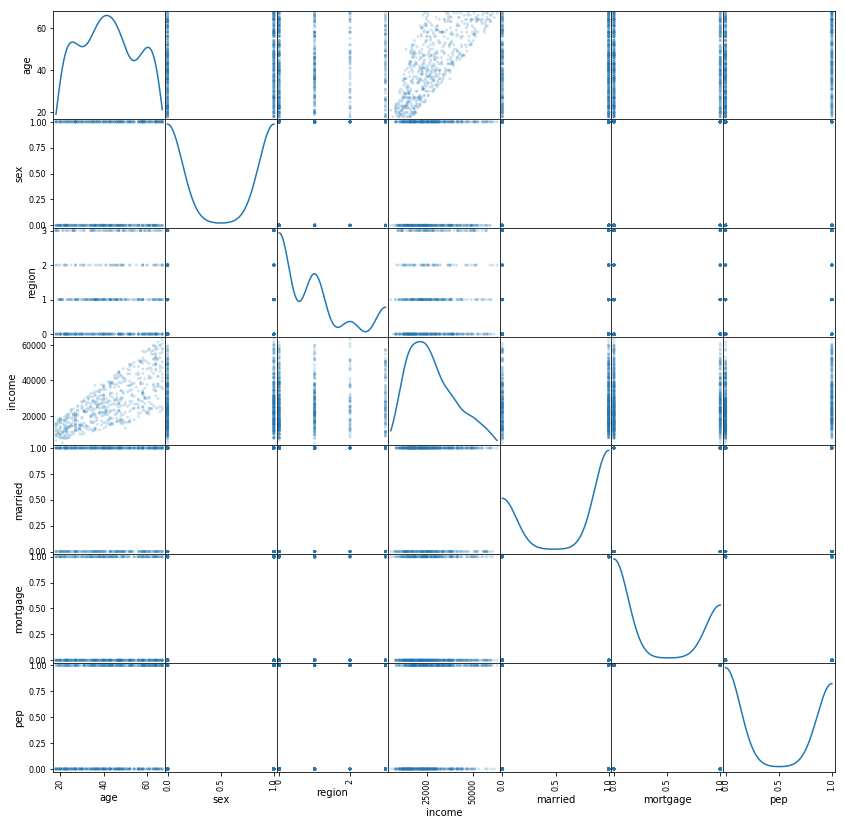

In [80]:
from pandas.plotting import scatter_matrix

my_features = ['age', 'sex', 'region', 'income', 'married', 'mortgage', 'pep']

#fig = scatter_matrix(df_bank2, alpha=0.2, figsize=(14, 14), diagonal='kde')
fig = scatter_matrix(df_bank2[my_features], alpha=0.2, figsize=(14, 14), diagonal='kde')

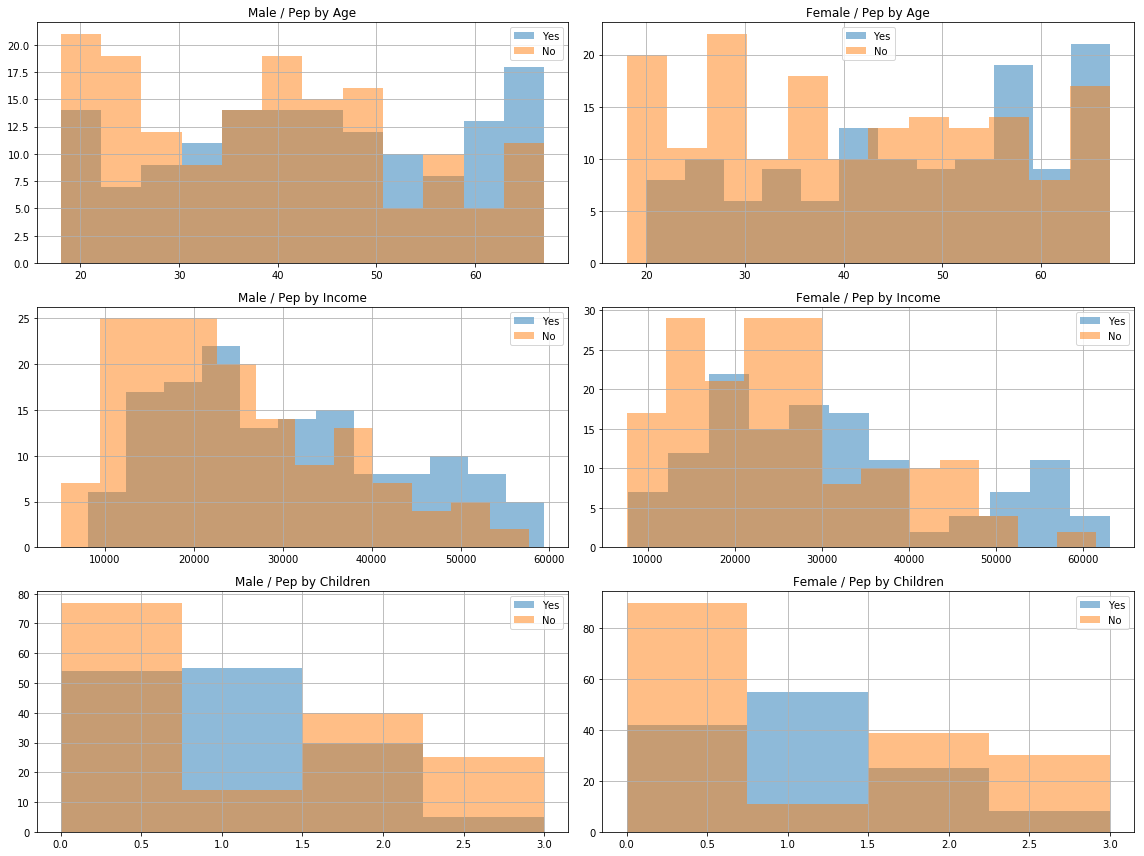

In [81]:
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(16,12))

df_bank2[(df_bank2.sex == 0) & (df_bank2.pep == 1)]['age'].hist(ax=axes[0,0], bins=12, alpha=0.5, label='Yes')
df_bank2[(df_bank2.sex == 0) & (df_bank2.pep == 0)]['age'].hist(ax=axes[0,0], bins=12, alpha=0.5, label='No')
axes[0,0].set_title('Male / Pep by Age')
axes[0,0].legend()

df_bank2[(df_bank2.sex == 1) & (df_bank2.pep == 1)]['age'].hist(ax=axes[0,1], bins=12, alpha=0.5, label='Yes')
df_bank2[(df_bank2.sex == 1) & (df_bank2.pep == 0)]['age'].hist(ax=axes[0,1], bins=12, alpha=0.5, label='No')
axes[0,1].set_title('Female / Pep by Age')
axes[0,1].legend()

df_bank2[(df_bank2.sex == 0) & (df_bank2.pep == 1)]['income'].hist(ax=axes[1,0], bins=12, alpha=0.5, label='Yes')
df_bank2[(df_bank2.sex == 0) & (df_bank2.pep == 0)]['income'].hist(ax=axes[1,0], bins=12, alpha=0.5, label='No')
axes[1,0].set_title('Male / Pep by Income')
axes[1,0].legend()

df_bank2[(df_bank2.sex == 1) & (df_bank2.pep == 1)]['income'].hist(ax=axes[1,1], bins=12, alpha=0.5, label='Yes')
df_bank2[(df_bank2.sex == 1) & (df_bank2.pep == 0)]['income'].hist(ax=axes[1,1], bins=12, alpha=0.5, label='No')
axes[1,1].set_title('Female / Pep by Income')
axes[1,1].legend()

df_bank2[(df_bank2.sex == 0) & (df_bank2.pep == 1)]['children'].hist(ax=axes[2,0], bins=4, alpha=0.5, label='Yes')
df_bank2[(df_bank2.sex == 0) & (df_bank2.pep == 0)]['children'].hist(ax=axes[2,0], bins=4, alpha=0.5, label='No')
axes[2,0].set_title('Male / Pep by Children')
axes[2,0].legend()

df_bank2[(df_bank2.sex == 1) & (df_bank2.pep == 1)]['children'].hist(ax=axes[2,1], bins=4, alpha=0.5, label='Yes')
df_bank2[(df_bank2.sex == 1) & (df_bank2.pep == 0)]['children'].hist(ax=axes[2,1], bins=4, alpha=0.5, label='No')
axes[2,1].set_title('Female / Pep by Children')
axes[2,1].legend()

fig.tight_layout()

### [Building a Decision Tree](http://scikit-learn.org/stable/modules/tree.html)

[1](http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier), [2](http://stackoverflow.com/questions/18753709/how-to-make-sense-the-output-of-decisiontreeclassifier-in-scikit-learn), [3](http://stackoverflow.com/questions/23557545/how-to-explain-the-decision-tree-from-scikit-learn), [4](https://github.com/paulgb/sklearn-pandas)

In [82]:
#Install http://www.graphviz.org/ & 
#Instal https://pypi.python.org/pypi/pydotplus

#http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html
from sklearn import tree
from io import StringIO
from IPython.display import Image #needed to render in notebook
import pydotplus

In [83]:
#clf = tree.DecisionTreeClassifier(criterion='entropy', max_features="auto", min_samples_leaf=10)
clf = tree.DecisionTreeClassifier(criterion='gini', max_features=None, min_samples_leaf=10)
features_list=['age', 'sex', 'region', 'income', 'married', 'children', 'car', 'save_act', 'current_act', 'mortgage']
clf.fit(df_bank2[features_list], df_bank2.pep)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=10, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [84]:
print(clf.n_features_)
print(clf.feature_importances_)

10
[0.02068086 0.00691704 0.01096521 0.32759655 0.10334578 0.27096397
 0.         0.11550949 0.00757892 0.13644217]


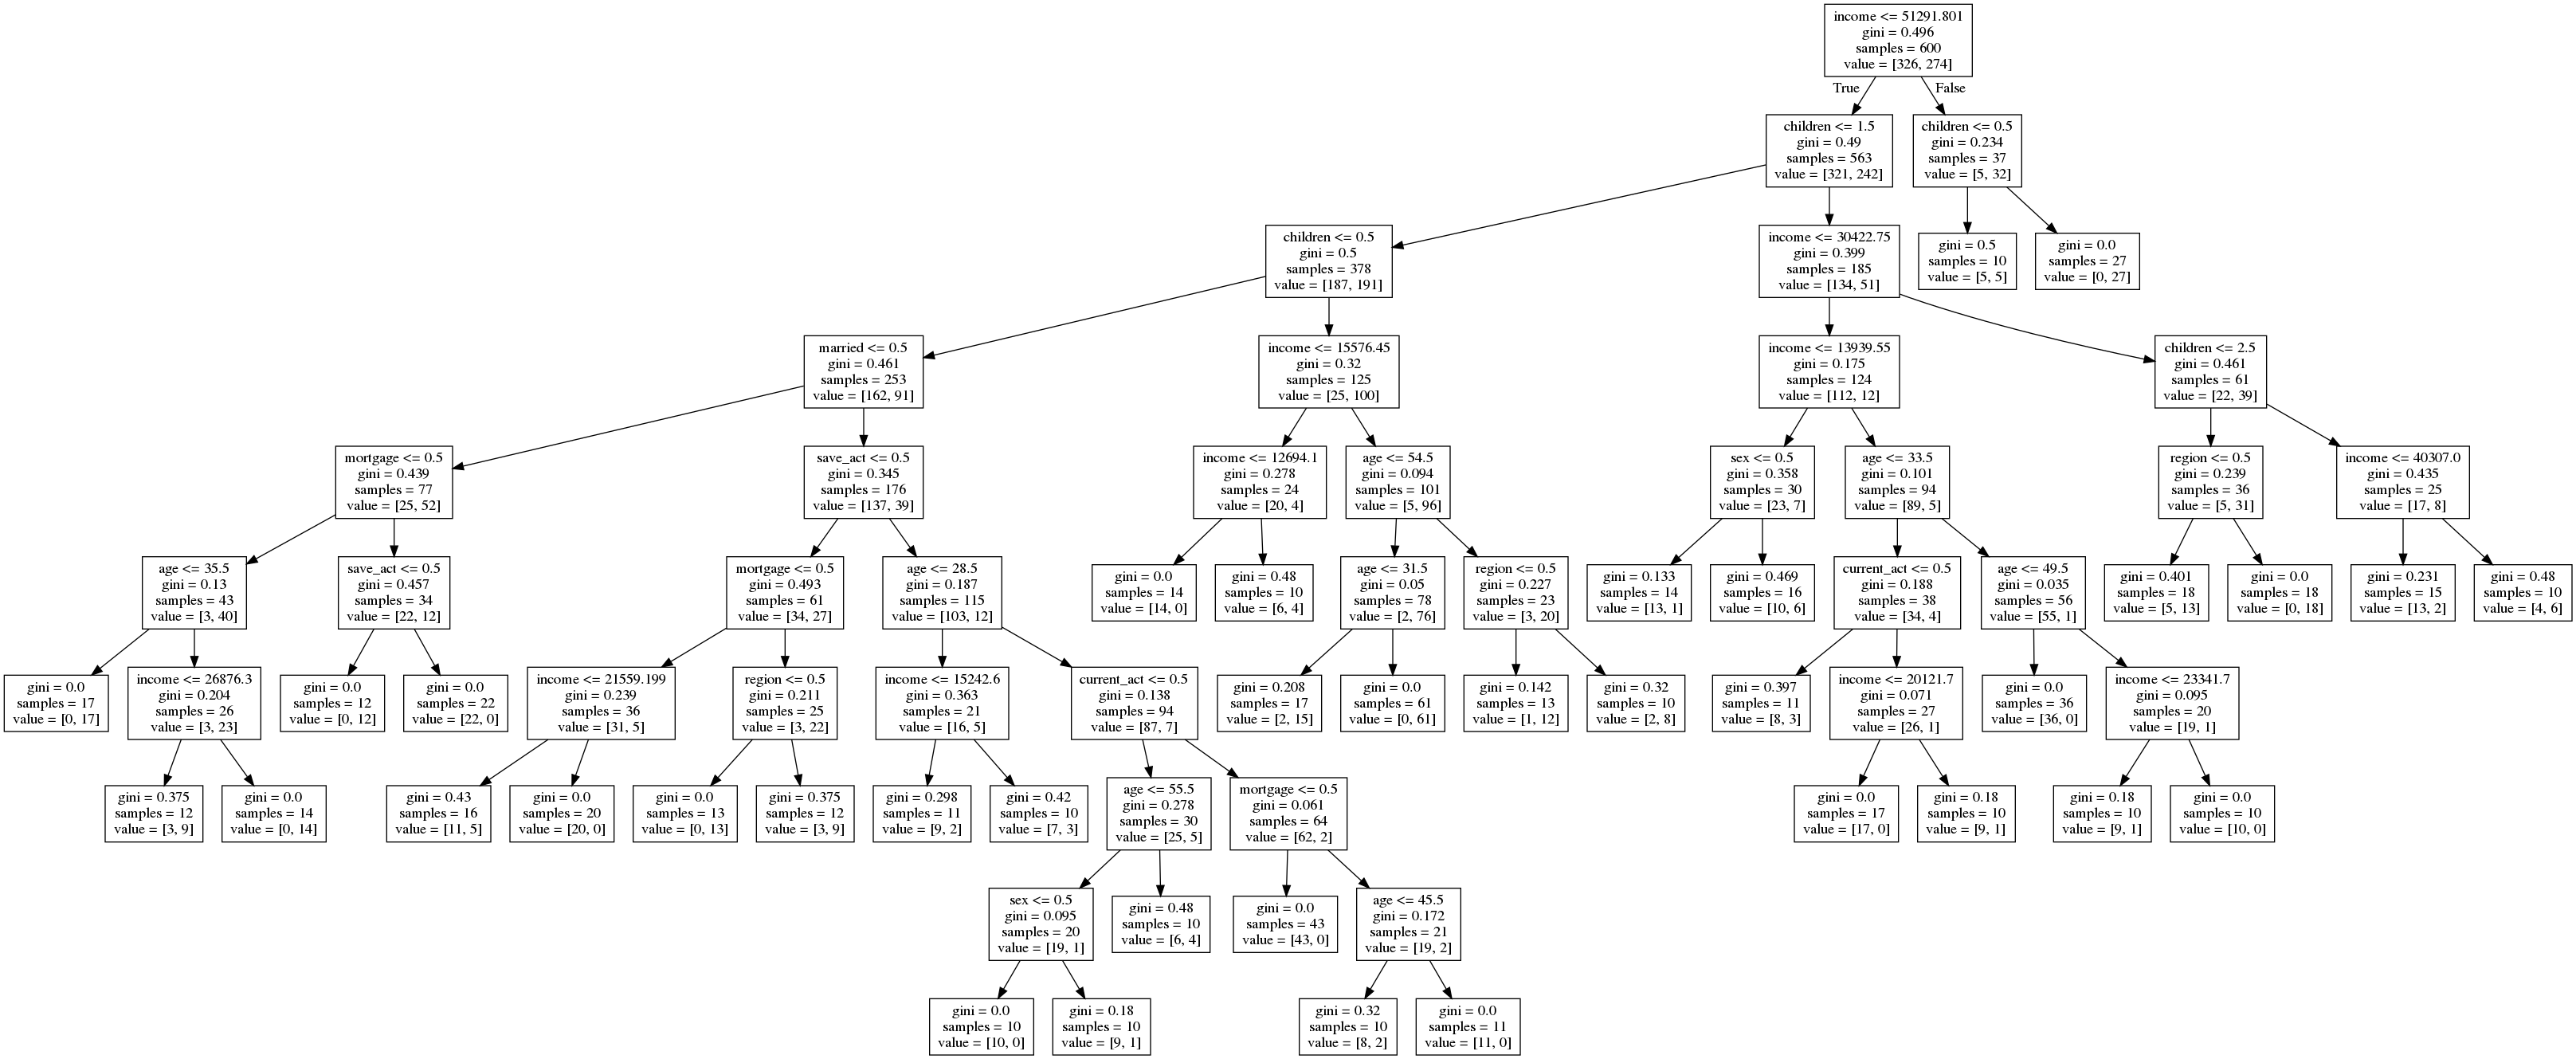

In [85]:
dot_data = StringIO()
tree.export_graphviz(clf, out_file=dot_data, feature_names=features_list) 
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

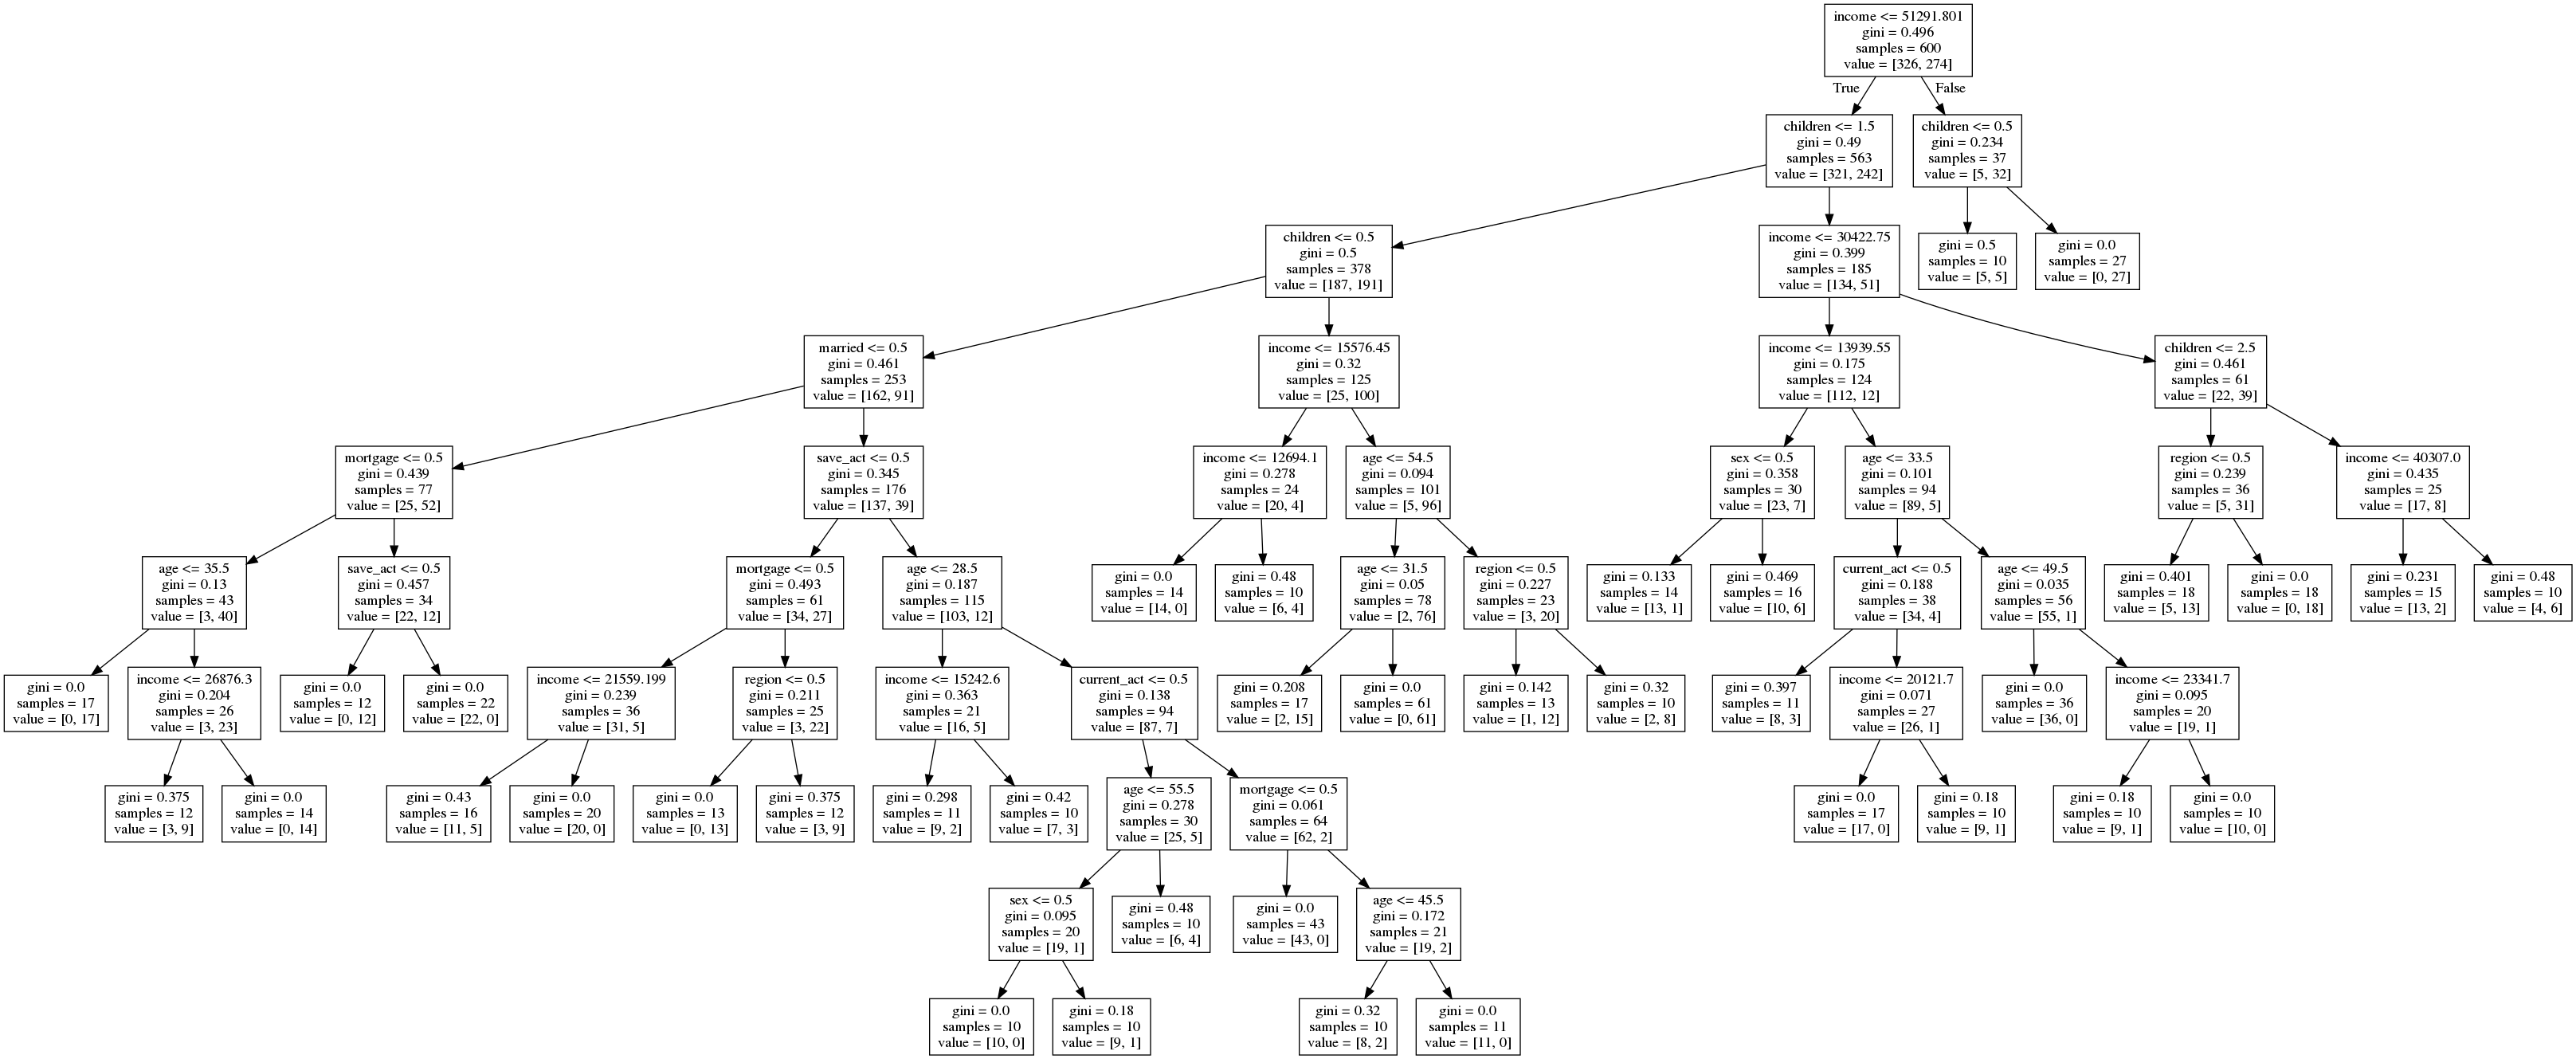

In [86]:
#Saving the generated tree to a figure
with open(os.path.join(outputs, "bank_pep.dot"), 'w') as f:
    f = tree.export_graphviz(clf, out_file=f, feature_names=features_list)
    
#Calling an external program with the operator "!"
!dot -Tpng ../outputs/bank_pep.dot -o ../outputs/bank_pep.png
Image("../outputs/bank_pep.png")

In [87]:
#df_bank2[features_list][0:5]
df_bank2[0:5]

,age,sex,region,income,married,children,car,save_act,current_act,mortgage,pep
0,48,1,0,17546.0,0,1,0,0,0,0,1
1,40,0,1,30085.1,1,3,1,0,1,1,0
2,51,1,0,16575.4,1,0,1,1,1,0,0
3,23,1,1,20375.4,1,3,0,0,1,0,0
4,57,1,3,50576.3,1,0,0,1,0,0,0


In [88]:
new_data = np.array([40,0,1,30085.0,1,3,1,0,1,1]).reshape(1,-1)
clf.predict(new_data)

array([0])

#### Visualizing the decision surface 

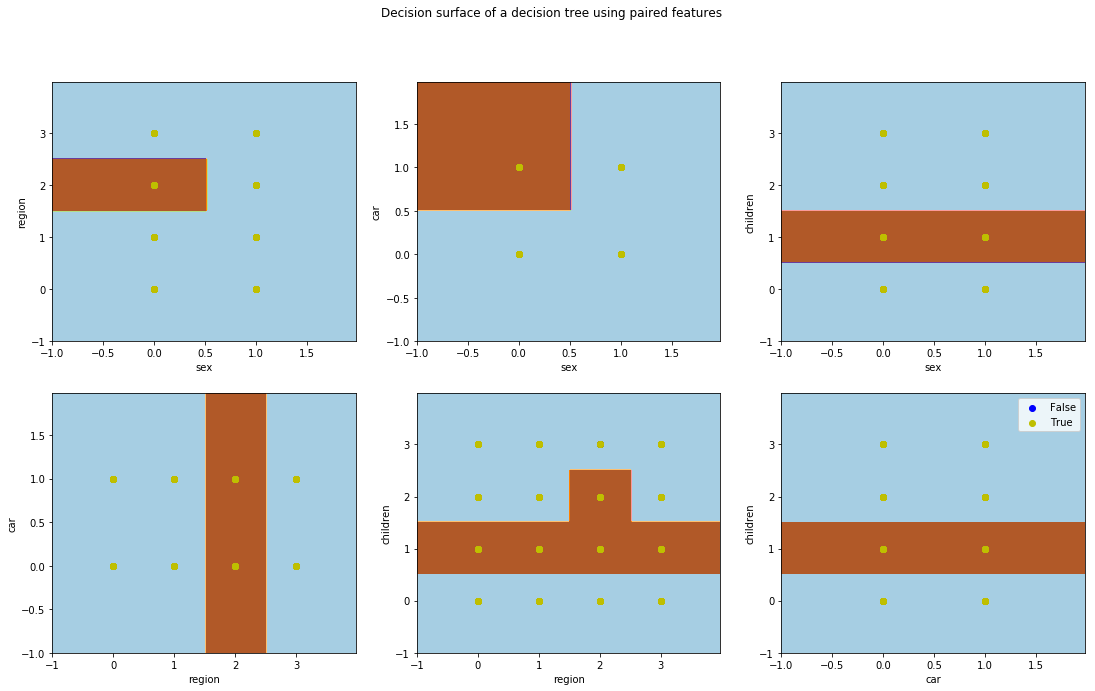

In [89]:
from sklearn.tree import DecisionTreeClassifier

# Parameters
n_classes = 2
plot_colors = "by"
plot_step = 0.02
outcome = ['False','True']

for pairidx, pair in enumerate([['sex','region'], ['sex', 'car'], ['sex', 'children'],
                                ['region', 'car'], ['region', 'children'], ['car', 'children']]):
    # We only take the two corresponding features
    X = df_bank2[pair].values
    y = df_bank2.pep

    # Shuffle
    #idx = np.arange(X.shape[0])
    #np.random.seed(13)
    #np.random.shuffle(idx)
    #X = X[idx]
    #y = y[idx]

    # Standardize
    #mean = X.mean(axis=0)
    #std = X.std(axis=0)
    #X = (X - mean) / std

    # Train
    clf2 = DecisionTreeClassifier().fit(X, y)

    # Plot the decision boundary
    plt.subplot(2, 3, pairidx + 1)

    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))

    Z = clf2.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    cs = plt.contourf(xx, yy, Z, cmap=plt.cm.Paired)

    plt.xlabel(pair[0])
    plt.ylabel(pair[1])
    plt.axis("tight")

    # Plot the training points
    for i, color in zip(range(n_classes), plot_colors):
        idx = np.where(y == i)
        plt.scatter(X[:, 0], X[:, 1], c=color, label=outcome[i], cmap=plt.cm.Paired)
    plt.axis("tight")

plt.suptitle("Decision surface of a decision tree using paired features")
fig = plt.gcf()
fig.set_size_inches(18.5,10.5)
plt.legend()
plt.show()

#### K-Means Clustering

http://scikit-learn.org/stable/auto_examples/cluster/plot_cluster_iris.html

In [90]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import scale
from mpl_toolkits.mplot3d import Axes3D

In [91]:
centers = [[1, 1], [-1, -1], [1, -1]]

X = df_bank2[['age','income','region']].values

estimators = {'k_means_3': KMeans(n_clusters=3),
              'k_means_8': KMeans(n_clusters=8),
              'k_means_bad_init': KMeans(n_clusters=3, n_init=1, init='random')}

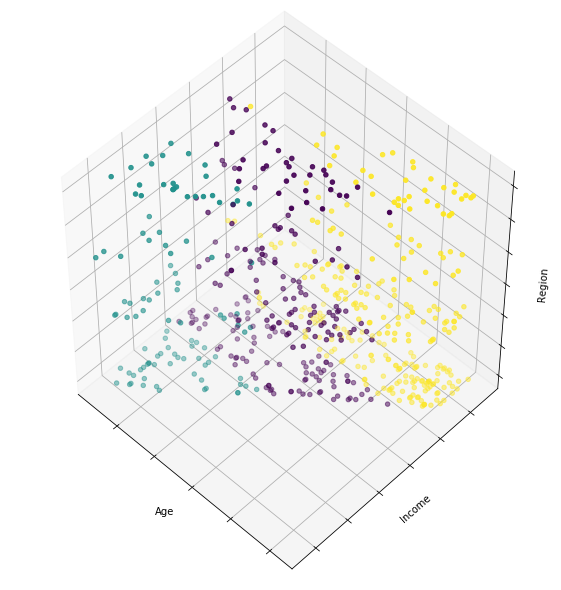

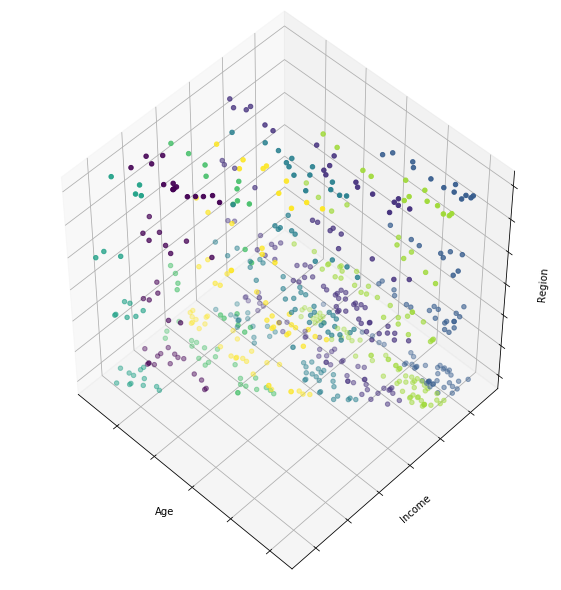

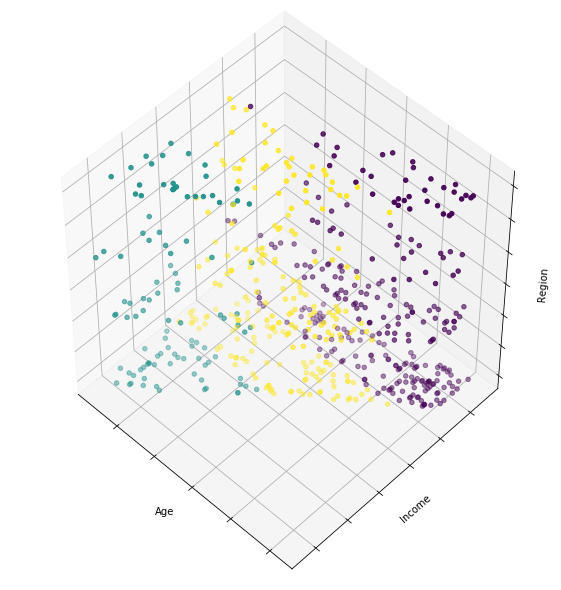

In [92]:
fignum = 1
for name, est in estimators.items():
    fig = plt.figure(fignum, figsize=(8,8))
    plt.clf()
    ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)

    plt.cla()
    est.fit(X)
    labels = est.labels_

    ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=labels.astype(np.float))
    ax.w_xaxis.set_ticklabels([])
    ax.w_yaxis.set_ticklabels([])
    ax.w_zaxis.set_ticklabels([])
    ax.set_xlabel('Age')
    ax.set_ylabel('Income')
    ax.set_zlabel('Region')
    ax.set_label(name)
    fignum = fignum + 1

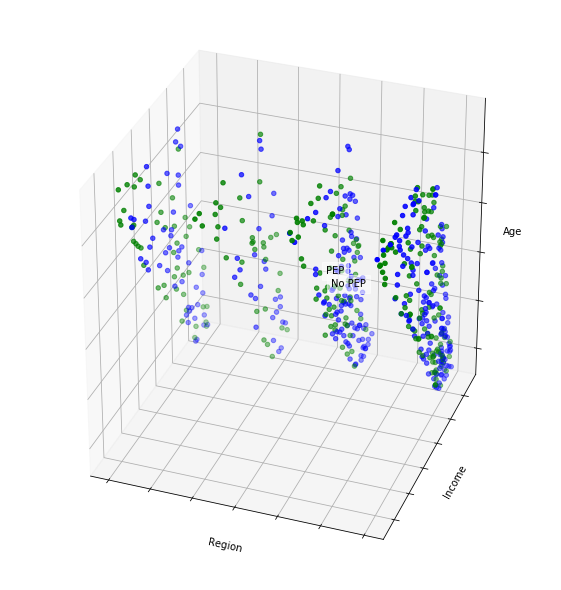

In [93]:
# Plot the ground truth
fig = plt.figure(fignum, figsize=(8, 8))
plt.clf()
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=30, azim=110)

plt.cla()

X = df_bank2[['age','income','region']].values
y = df_bank2.pep

for name, label in [('PEP', 1),('No PEP', 0)]:
    ax.text3D(X[y == label, 2].mean(),
              X[y == label, 1].mean() + 1.5,
              X[y == label, 0].mean(), name,
              horizontalalignment='center',
              bbox=dict(alpha=.5, edgecolor='w', facecolor='w'))
# Reorder the labels to have colors matching the cluster results
y = np.choose(y, ['b','g'])
ax.scatter(X[:, 2], X[:, 1], X[:, 0], c=y)

ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])
ax.set_xlabel('Region')
ax.set_ylabel('Income')
ax.set_zlabel('Age')
plt.show()

In [94]:
# Adapting the exemple: http://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_digits.html  
from time import time
from sklearn import metrics
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale

In [95]:
df_bank2.head(1)

,age,sex,region,income,married,children,car,save_act,current_act,mortgage,pep
0,48,1,0,17546.0,0,1,0,0,0,0,1


In [96]:
np.random.seed(42)
data = scale(df_bank2[features_list])
labels = df_bank2.pep.values
n_samples, n_features = data.shape
n_targets = len(np.unique(labels))
print(data.shape)
print(labels.shape)

(600, 10)
(600,)


n_targets: 2, 	 n_samples 600, 	 n_features 10
_______________________________________________________________________________
init    time  inertia    homo   compl  v-meas     ARI AMI  silhouette
k-means++   0.04s    5204   0.010   0.010   0.010   0.014   0.009    0.117
   random   0.05s    5204   0.010   0.010   0.010   0.014   0.009    0.120
PCA-based   0.01s    5204   0.011   0.011   0.011   0.014   0.010    0.123
_______________________________________________________________________________


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/cluster/supervised.py:746: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/cluster/supervised.py:746: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/cluster/supervised.py:746: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)


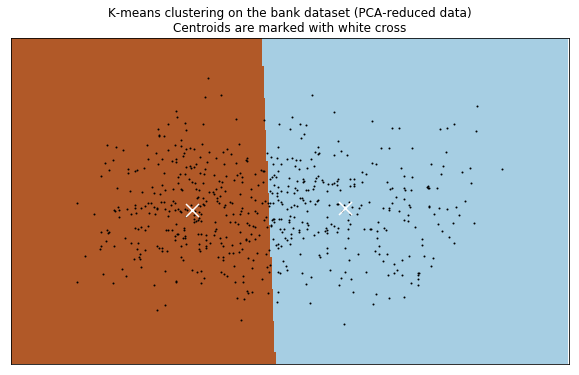

In [97]:
sample_size = 300

print("n_targets: %d, \t n_samples %d, \t n_features %d"
      % (n_targets, n_samples, n_features))

print(79 * '_')
print('% 9s' % 'init'
      '    time  inertia    homo   compl  v-meas     ARI AMI  silhouette')

def bench_k_means(estimator, name, data):
    t0 = time()
    estimator.fit(data)
    print('% 9s   %.2fs    %i   %.3f   %.3f   %.3f   %.3f   %.3f    %.3f'
          % (name, (time() - t0), estimator.inertia_,
             metrics.homogeneity_score(labels, estimator.labels_),
             metrics.completeness_score(labels, estimator.labels_),
             metrics.v_measure_score(labels, estimator.labels_),
             metrics.adjusted_rand_score(labels, estimator.labels_),
             metrics.adjusted_mutual_info_score(labels,  estimator.labels_),
             metrics.silhouette_score(data, estimator.labels_,
                                      metric='euclidean',
                                      sample_size=sample_size)))

bench_k_means(KMeans(init='k-means++', n_clusters=n_targets, n_init=10),
              name="k-means++", data=data)

bench_k_means(KMeans(init='random', n_clusters=n_targets, n_init=10),
              name="random", data=data)

# in this case the seeding of the centers is deterministic, hence we run the
# kmeans algorithm only once with n_init=1
pca = PCA(n_components=n_targets).fit(data)
bench_k_means(KMeans(init=pca.components_, n_clusters=n_targets, n_init=1),
              name="PCA-based",
              data=data)
print(79 * '_')

###############################################################################
# Visualize the results on PCA-reduced data

reduced_data = PCA(n_components=2).fit_transform(data)
kmeans = KMeans(init='k-means++', n_clusters=n_targets, n_init=10)
kmeans.fit(reduced_data)

# Step size of the mesh. Decrease to increase the quality of the VQ.
h = .02     # point in the mesh [x_min, m_max]x[y_min, y_max].

# Plot the decision boundary. For that, we will assign a color to each
x_min, x_max = reduced_data[:, 0].min() - 1, reduced_data[:, 0].max() + 1
y_min, y_max = reduced_data[:, 1].min() - 1, reduced_data[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Obtain labels for each point in mesh. Use last trained model.
Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1, figsize=(10,6))
plt.clf()
plt.imshow(Z, interpolation='nearest',
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap=plt.cm.Paired,
           aspect='auto', origin='lower')

plt.plot(reduced_data[:, 0], reduced_data[:, 1], 'k.', markersize=2)
# Plot the centroids as a white X
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1],
            marker='x', s=169, linewidths=3,
            color='w', zorder=10)
plt.title('K-means clustering on the bank dataset (PCA-reduced data)\n'
          'Centroids are marked with white cross')
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())
plt.show()